# Machine Learning Use Case "Surface Type Classification"
## Section A - Introduction

Q1 - What kind of data we have?


Q2 - What kind of objective we have?

Q3 - Is there a specific Methodology to follow? OSEMN

## Section B - Rsearch Questions:

RQ1 - What are the main features that help in detecting the surface type? 

RQ2 - How to use these features to classify the surface type? 

RQ3 - How to evaluate the reliability of the model?

## Section C - Research Objectives

RO1 - Utilize IoT sensors to capture x, y, z accelerometer and x, y, z gyroscope data.

RO2 - Employ machine learning techniques to understand patterns and classify surfaces accordingly. 

RO3 - Perform a train-test split to evaluate the performance of the model. 

## Section D - Research Methodology

## Section E - Exploratory Data Analysis (EDA)

#### Section E-1 Loading data


In [1]:
# Import necessary libraries
import pandas as pd # For data frame reading/manipulation
import numpy as np # For mathematical calculations
import matplotlib.pyplot as plt # For plotting

In [2]:
# Grass Slopy Wet Surface DataFrame
GSW = pd.read_csv('../datasets/Bushra/24_grass_slopy_wet.csv', header = None) # Setting header as 'None' because the data does not have the column names

# Asphalt Flat Wet Surface DataFrame
AFW = pd.read_csv('../datasets/Bushra/22_asphalt_flat_wet.csv', header = None) 

# Concerete Dry Flat Surface DataFrame
CDF = pd.read_csv('../datasets/Bushra/22_asphalt_flat_wet.csv', header = None) 

# Stones Coarse Wet Surface DataFrame
SCW = pd.read_csv('../datasets/Bushra/14_stones_coarse_wet.csv', header = None)

# Tile Smooth Surface DataFrame
TS = pd.read_csv('../datasets/Bushra/14_stones_coarse_wet.csv', header = None)

In [3]:
# Defining the dictionary of tables we have to easily access them later on

# Dictionary = {'key':'Item'}
dict_of_tables = {'GSW': GSW, 'AFW': AFW, 'CDF': CDF, 'SCW': SCW, 'TS': TS}

#### Section E-2 Defining Columns names


In [4]:
# for table_name, table in dict_of_tables.items():
#     print(table)

In [5]:
# Define column names
column_names = ['Timestamp', 'x-accelerometer', 'y-accelerometer','z-accelerometer',
               'x-gyroscope','y-gyroscope','z-gyroscope']

# Iterate over each DataFrame in the dictionary and apply the code
for table_name, table in dict_of_tables.items():
    # Assign column names to the DataFrame
    table.columns = column_names

#### Section E-3 Exploring head and tail of each table


In [6]:
# # Exploring head and tail of each table
# print('The top 3 rows of GSW are')
# display(GSW.head(3))

# print('The last 3 rows of GSW are')
# display(GSW.tail(3))

# print('-'*25) # Segmenting between tables

# print('The top 3 rows of AFW are')
# display(AFW.head(3))

# print('The last 3 rows of AFW are')
# display(AFW.tail(3))

# print('-'*25) 
# print('The top 3 rows of CDF are')
# display(CDF.head(3))

# print('The last 3 rows of CDF are')
# display(CDF.tail(3))

# print('-'*25) 

# print('The top 3 rows of GMS are')
# display(GMS.head(3))

# print('The last 3 rows of GMS are')
# display(GMS.tail(3))

# print('-'*25) 

# print('The top 3 rows of CDB are')
# display(CDB.head(3))

# print('The last 3 rows of CDB are')
# display(CDB.tail(3))

# print('-'*25) 

# print('The top 3 rows of ADF are')
# display(ADF.head(3))

# print('The last 3 rows of ADF are')
# display(ADF.tail(3))

# print('-'*25) 


# print('The top 3 rows of TM are')
# display(TM.head(3))

# print('The last 3 rows of TM are')
# display(TM.tail(3))

In [7]:
# Iterate over each DataFrame in the dictionary and print head and tail
for table_name, table in dict_of_tables.items():
    
    print(f'The top 3 rows of {table_name} are')
    display(table.head(3))
    
    print(f'The last 3 rows of {table_name} are')
    display(table.tail(3))
    
    print('-'*50) # Segmenting between tables


The top 3 rows of GSW are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-21 13:46:48.330        -0.049316        -0.229492        -0.989746   
1  2024-03-21 13:46:48.340        -0.036865        -0.238770        -0.980957   
2  2024-03-21 13:46:48.349        -0.037842        -0.240479        -0.977051   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     1.663208    -0.289917     0.381470  
1     1.678467    -0.396728     0.106812  
2     1.785278    -0.442505    -0.045776

The last 3 rows of GSW are


Timestamp  x-accelerometer  y-accelerometer  \
6037  2024-03-21 13:47:48.569         0.007324        -0.151611   
6038  2024-03-21 13:47:48.580         0.004639        -0.156250   
6039  2024-03-21 13:47:48.590         0.002197        -0.157959   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
6037        -0.999023     0.869751     0.137329     0.289917  
6038        -0.997070     0.778198     0.122070     0.152588  
6039        -0.997559     0.885010     0.091553     0.061035

--------------------------------------------------
The top 3 rows of AFW are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-20 10:27:23.329         0.007080        -0.037842        -1.012207   
1  2024-03-20 10:27:23.340         0.006592        -0.036865        -1.011963   
2  2024-03-20 10:27:23.350         0.001953        -0.037354        -1.006592   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     0.717163     0.289917     0.000000  
1     0.671387     0.244141     0.076294  
2     0.778198     0.198364    -0.030518

The last 3 rows of AFW are


Timestamp  x-accelerometer  y-accelerometer  \
8877  2024-03-20 10:28:51.910         0.013672        -0.075928   
8878  2024-03-20 10:28:51.920         0.014648        -0.074951   
8879  2024-03-20 10:28:51.930         0.012207        -0.076172   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
8877        -1.005859     0.686645     0.259399     0.061035  
8878        -1.007080     0.732422     0.259399     0.076294  
8879        -1.008789     0.671387     0.350952     0.122070

--------------------------------------------------
The top 3 rows of CDF are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-20 10:27:23.329         0.007080        -0.037842        -1.012207   
1  2024-03-20 10:27:23.340         0.006592        -0.036865        -1.011963   
2  2024-03-20 10:27:23.350         0.001953        -0.037354        -1.006592   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     0.717163     0.289917     0.000000  
1     0.671387     0.244141     0.076294  
2     0.778198     0.198364    -0.030518

The last 3 rows of CDF are


Timestamp  x-accelerometer  y-accelerometer  \
8877  2024-03-20 10:28:51.910         0.013672        -0.075928   
8878  2024-03-20 10:28:51.920         0.014648        -0.074951   
8879  2024-03-20 10:28:51.930         0.012207        -0.076172   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
8877        -1.005859     0.686645     0.259399     0.061035  
8878        -1.007080     0.732422     0.259399     0.076294  
8879        -1.008789     0.671387     0.350952     0.122070

--------------------------------------------------
The top 3 rows of SCW are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-20 09:47:20.329        -0.066895        -0.076416        -1.004883   
1  2024-03-20 09:47:20.340        -0.072021        -0.081543        -1.003418   
2  2024-03-20 09:47:20.350        -0.076416        -0.080078        -1.003174   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     0.640869     0.320435     0.015259  
1     0.778198     0.274658    -0.030518  
2     0.762939     0.183105     0.015259

The last 3 rows of SCW are


Timestamp  x-accelerometer  y-accelerometer  \
9917  2024-03-20 09:48:59.290        -0.097656        -0.060791   
9918  2024-03-20 09:48:59.299        -0.097168        -0.061035   
9919  2024-03-20 09:48:59.310        -0.097900        -0.060791   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
9917        -1.002930     0.823975     0.152588     0.045776  
9918        -1.001953     0.778198     0.183105     0.000000  
9919        -1.002197     0.610352     0.228882     0.030518

--------------------------------------------------
The top 3 rows of TS are


Timestamp  x-accelerometer  y-accelerometer  z-accelerometer  \
0  2024-03-20 09:47:20.329        -0.066895        -0.076416        -1.004883   
1  2024-03-20 09:47:20.340        -0.072021        -0.081543        -1.003418   
2  2024-03-20 09:47:20.350        -0.076416        -0.080078        -1.003174   

   x-gyroscope  y-gyroscope  z-gyroscope  
0     0.640869     0.320435     0.015259  
1     0.778198     0.274658    -0.030518  
2     0.762939     0.183105     0.015259

The last 3 rows of TS are


Timestamp  x-accelerometer  y-accelerometer  \
9917  2024-03-20 09:48:59.290        -0.097656        -0.060791   
9918  2024-03-20 09:48:59.299        -0.097168        -0.061035   
9919  2024-03-20 09:48:59.310        -0.097900        -0.060791   

      z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope  
9917        -1.002930     0.823975     0.152588     0.045776  
9918        -1.001953     0.778198     0.183105     0.000000  
9919        -1.002197     0.610352     0.228882     0.030518

--------------------------------------------------


#### Section E-4 Checking datatype


In [8]:
# We will loop through each table to find the datatypes of the columns

for table_name, table in dict_of_tables.items():
    print('The table name is', table_name)
    print('table info is')
    display(table.info())
    print('-'*50)

The table name is GSW
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        6040 non-null   object 
 1   x-accelerometer  6040 non-null   float64
 2   y-accelerometer  6040 non-null   float64
 3   z-accelerometer  6040 non-null   float64
 4   x-gyroscope      6040 non-null   float64
 5   y-gyroscope      6040 non-null   float64
 6   z-gyroscope      6040 non-null   float64
dtypes: float64(6), object(1)
memory usage: 330.4+ KB


None

--------------------------------------------------
The table name is AFW
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        8880 non-null   object 
 1   x-accelerometer  8880 non-null   float64
 2   y-accelerometer  8880 non-null   float64
 3   z-accelerometer  8880 non-null   float64
 4   x-gyroscope      8880 non-null   float64
 5   y-gyroscope      8880 non-null   float64
 6   z-gyroscope      8880 non-null   float64
dtypes: float64(6), object(1)
memory usage: 485.8+ KB


None

--------------------------------------------------
The table name is CDF
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8880 entries, 0 to 8879
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        8880 non-null   object 
 1   x-accelerometer  8880 non-null   float64
 2   y-accelerometer  8880 non-null   float64
 3   z-accelerometer  8880 non-null   float64
 4   x-gyroscope      8880 non-null   float64
 5   y-gyroscope      8880 non-null   float64
 6   z-gyroscope      8880 non-null   float64
dtypes: float64(6), object(1)
memory usage: 485.8+ KB


None

--------------------------------------------------
The table name is SCW
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        9920 non-null   object 
 1   x-accelerometer  9920 non-null   float64
 2   y-accelerometer  9920 non-null   float64
 3   z-accelerometer  9920 non-null   float64
 4   x-gyroscope      9920 non-null   float64
 5   y-gyroscope      9920 non-null   float64
 6   z-gyroscope      9920 non-null   float64
dtypes: float64(6), object(1)
memory usage: 542.6+ KB


None

--------------------------------------------------
The table name is TS
table info is
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Timestamp        9920 non-null   object 
 1   x-accelerometer  9920 non-null   float64
 2   y-accelerometer  9920 non-null   float64
 3   z-accelerometer  9920 non-null   float64
 4   x-gyroscope      9920 non-null   float64
 5   y-gyroscope      9920 non-null   float64
 6   z-gyroscope      9920 non-null   float64
dtypes: float64(6), object(1)
memory usage: 542.6+ KB


None

--------------------------------------------------


In [9]:
# We noticed that the first column 'Timestamp' Dtype is 'object'

#### Section E-5 Fixing 'Timestamp' column datatype into timestamp



In [10]:
for table_name, table in dict_of_tables.items():
    table['Timestamp'] = pd.to_datetime(table['Timestamp']) # using pandas functionality to correct 'Timestamp' column datatype


In [11]:
# randomly checking of one of the tables
GSW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Timestamp        6040 non-null   datetime64[ns]
 1   x-accelerometer  6040 non-null   float64       
 2   y-accelerometer  6040 non-null   float64       
 3   z-accelerometer  6040 non-null   float64       
 4   x-gyroscope      6040 non-null   float64       
 5   y-gyroscope      6040 non-null   float64       
 6   z-gyroscope      6040 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 330.4 KB


#### Section E-6 Sorting by timestamp

In [12]:
for table_name, table in dict_of_tables.items():

    table.sort_values(by='Timestamp', inplace=True) # Sort the table by 'Timestamp' column #Using 'inplace' Argument to apply the changes on the same table

    # Resetting the index after sorting
    table.reset_index(drop=True, inplace=True)



#### Section E-7 Removing 20 seconds (noise at start and ending)

In [13]:
# testing_table = dict_of_tables['GSW']
# testing_table.columns[0]

In [14]:
# testing_table['Timestamp']

In [15]:
# Looping through 'dict_of_tables' that is containing DataFrames

for table_name, table in dict_of_tables.items():
    # Accessing 'Timestamp' column, which is the first column
    timestamp_column = table.columns[0]
    
    # Calculate 20 seconds
    time_delta = pd.Timedelta(seconds=20)
    
    # Filter out the first and last 20 seconds
    filtered_data = table[(table[timestamp_column] >= (table[timestamp_column].iloc[0] + time_delta)) &
                               (table[timestamp_column] <= (table[timestamp_column].iloc[-1] - time_delta))]
    
    # Update the dictionary with filtered data
    dict_of_tables[table_name] = filtered_data


#### Section E-7.5 Exporting the trimmed datasets 

In [16]:
!pwd # checking path working directory 

/Users/bushrajalali/COMP4030-Data-Science-with-Machine-Learning/code


In [17]:
import os

# Highlight the folder path
save_path = '../datasets/Bushra/'

# Iterate through each key-value pair in the dictionary
for table_name, table in dict_of_tables.items():
    # Define the file name for the CSV
    file_name = f"{table_name}_trimmed.csv"
    # Define the file path
    file_path = os.path.join(save_path, file_name)
    
    # Export the DataFrame to a CSV file
    table.to_csv(file_path, index=False)
    
    print(f"Table '{table_name}' exported to '{file_name}' in path '{save_path}'")


Table 'GSW' exported to 'GSW_trimmed.csv' in path '../datasets/Bushra/'
Table 'AFW' exported to 'AFW_trimmed.csv' in path '../datasets/Bushra/'
Table 'CDF' exported to 'CDF_trimmed.csv' in path '../datasets/Bushra/'
Table 'SCW' exported to 'SCW_trimmed.csv' in path '../datasets/Bushra/'
Table 'TS' exported to 'TS_trimmed.csv' in path '../datasets/Bushra/'


#### Section E-8 Create first 10 seconds tables

In [18]:
# firstTimestamp = testing_table['Timestamp'].iloc[0]
# ten_seconds_later = firstTimestamp + pd.Timedelta(seconds=10)

# firstTimestamp
# ten_seconds_later
# testing_table[testing_table['Timestamp'] <= ten_seconds_later]

In [19]:
# dict_of_tables_10_seconds

In [20]:
# for table_name, table in dict_of_tables_10_seconds.items():
#     print(table_name)

In [21]:
dict_of_tables_10_seconds = {} # Creating an empty dictionary to fill it up with 10_seconds tables

# looping through the dictionary of tables
for table_name, table in dict_of_tables.items():

    # get the starting timestamp
    first_timestamp = table['Timestamp'].iloc[0]  # Get the first timestamp
    
    ten_seconds_after_first_timestamp = first_timestamp + pd.Timedelta(seconds=10)  # Calculate 10 seconds after the first timestamp
    first_10_seconds = table[table['Timestamp'] <= ten_seconds_after_first_timestamp]  # Select rows up to 10 seconds after the first timestamp
    dict_of_tables_10_seconds[table_name] = first_10_seconds # Storing the new filtered tables into the new dictionary


In [22]:
# chkecing a random table in the dict_of_tables_5_seconds
# dict_of_tables_10_seconds['ADF']

#### Section E-9 Plotting the first 10 seconds

In [23]:
print('The tables are:')
for item, key in dict_of_tables_10_seconds.items():
    print(item)


The tables are:
GSW
AFW
CDF
SCW
TS


In [24]:
# Regular Method trying on GSW

In [25]:
# # Creating a figure and a set of subplots with 6 rows and 1 column, adjusting the figure size and spacing between subplots
# fig, ax = plt.subplots(6, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})

# # Iterating over each feature column (excluding the timestamp column) in the 'GSW' DataFrame
# for i, feature in enumerate(dict_of_tables_10_seconds['GSW'].columns[1:], 0):
    
#     # Plotting the feature against the timestamp for the 'GSW' DataFrame, with a green color
#     ax[i].plot(dict_of_tables_10_seconds['GSW']['Timestamp'], dict_of_tables_10_seconds['GSW'][feature], color='green')
    
#     # Setting the title for each subplot indicating the DataFrame name ('GSW') and the specific feature being plotted
#     ax[i].set_title('GSW ' + feature)
    
#     # Setting the x-axis label for each subplot
#     ax[i].set_xlabel('Timestamp')
    
#     # Setting the y-axis label for each subplot
#     ax[i].set_ylabel(feature)

# # Displaying the plot
# plt.show()


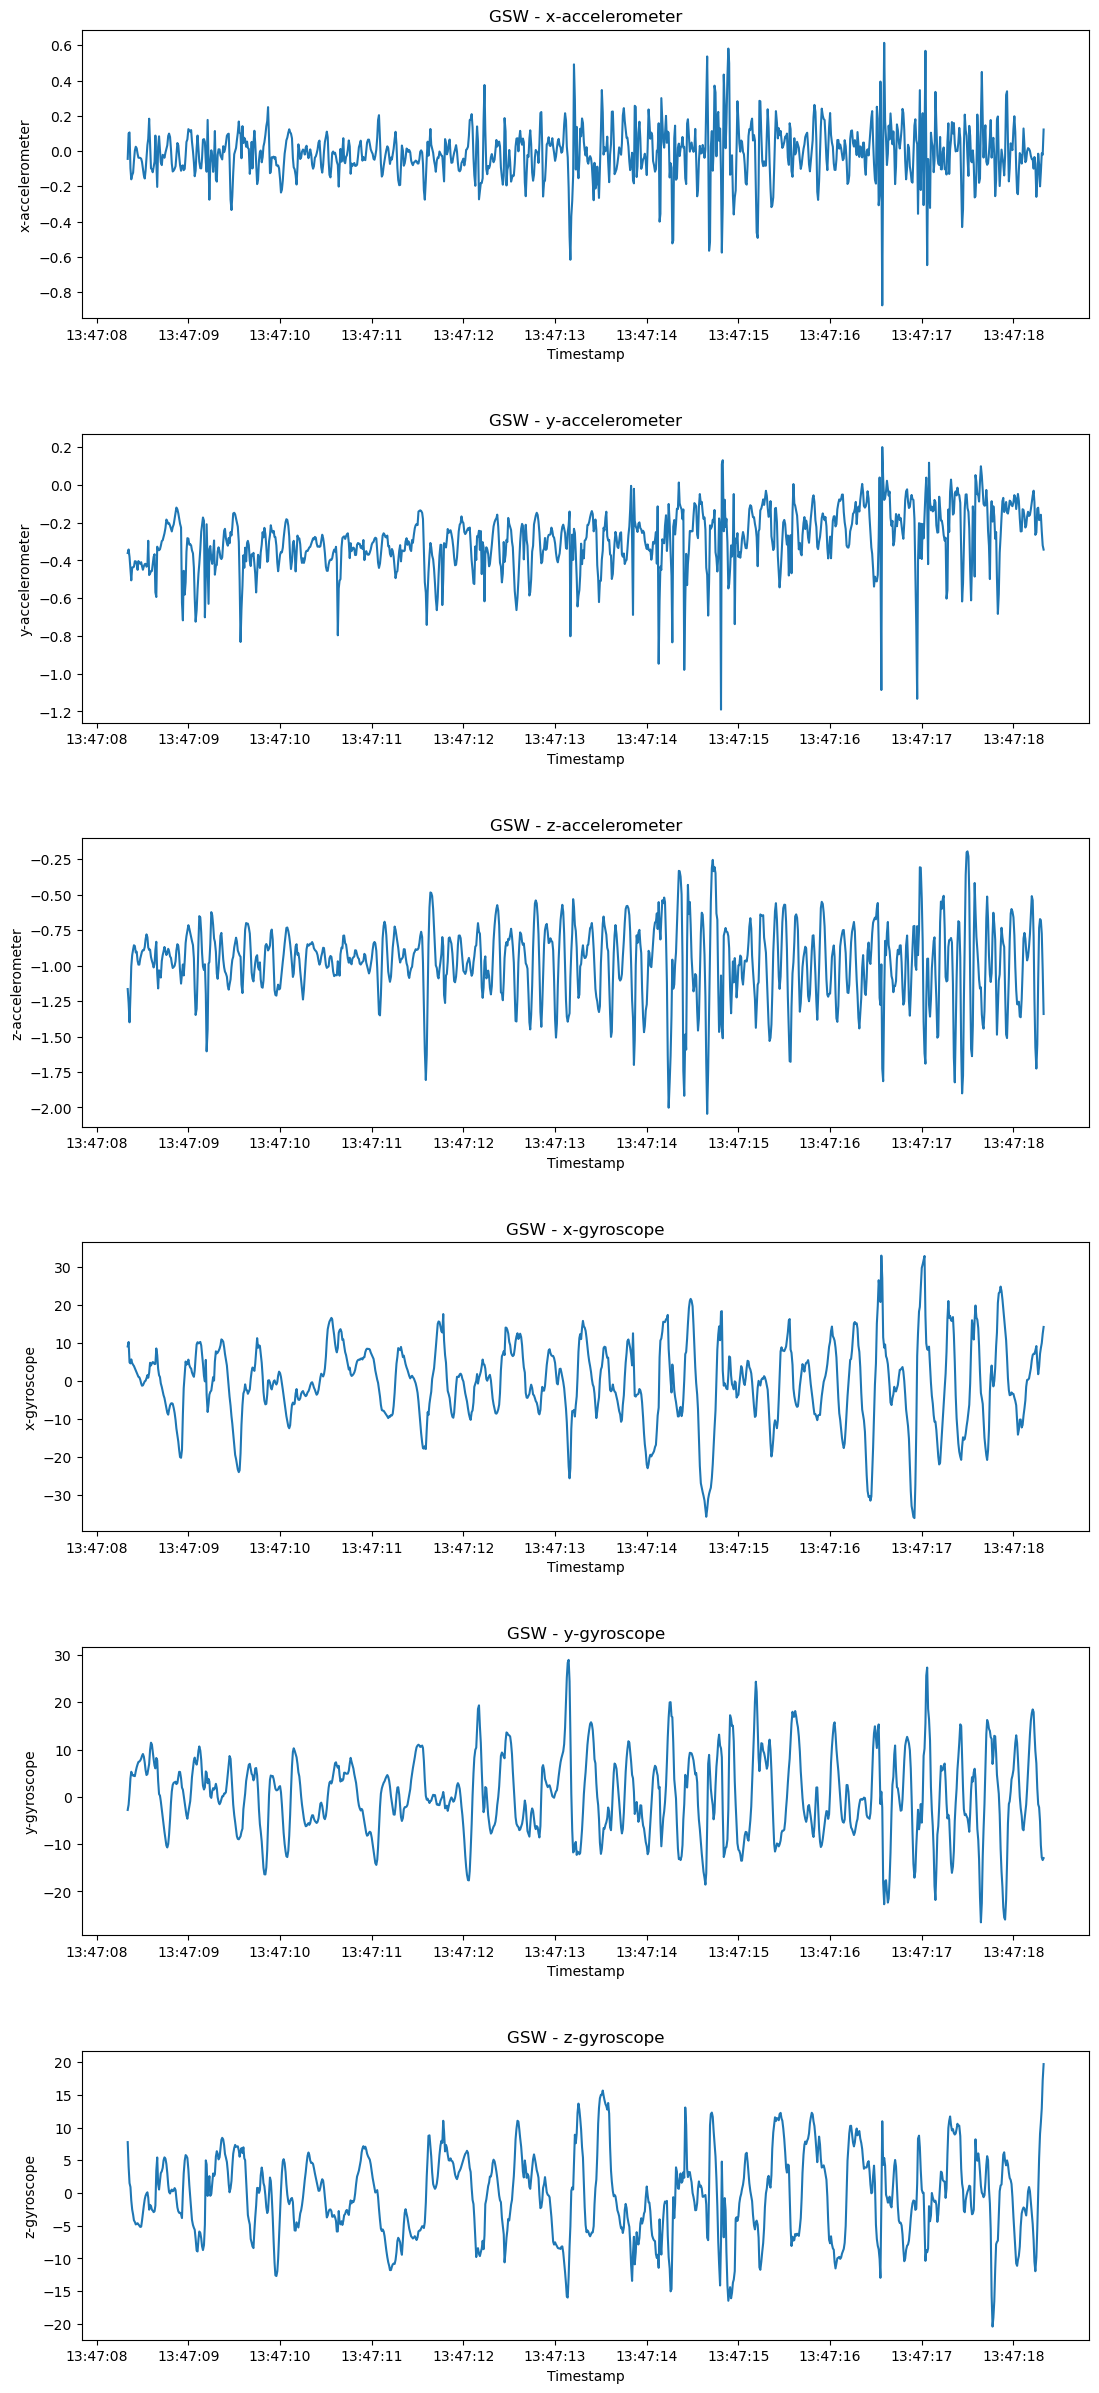

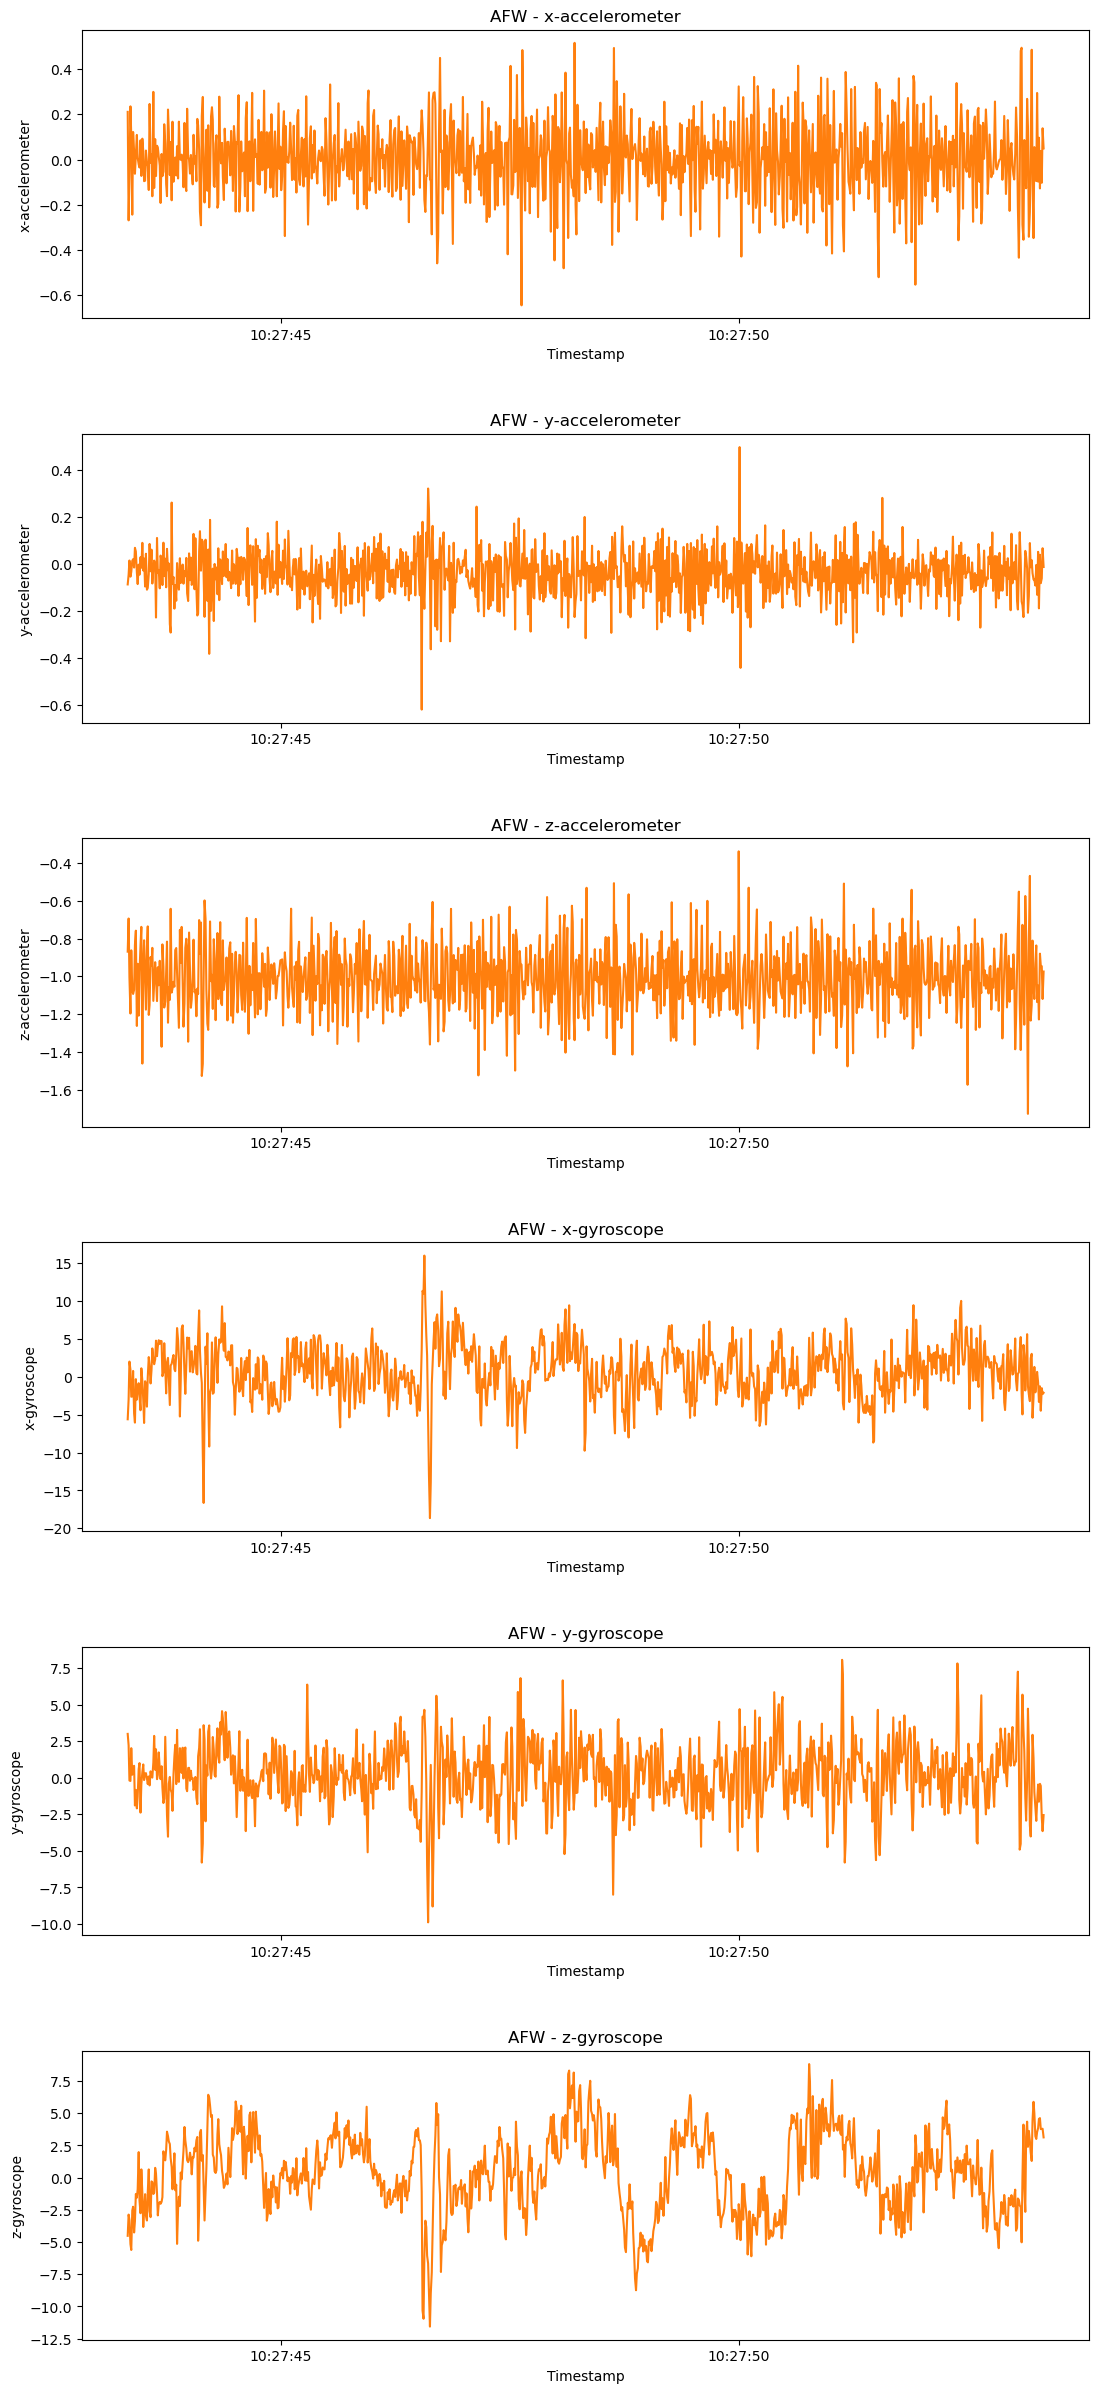

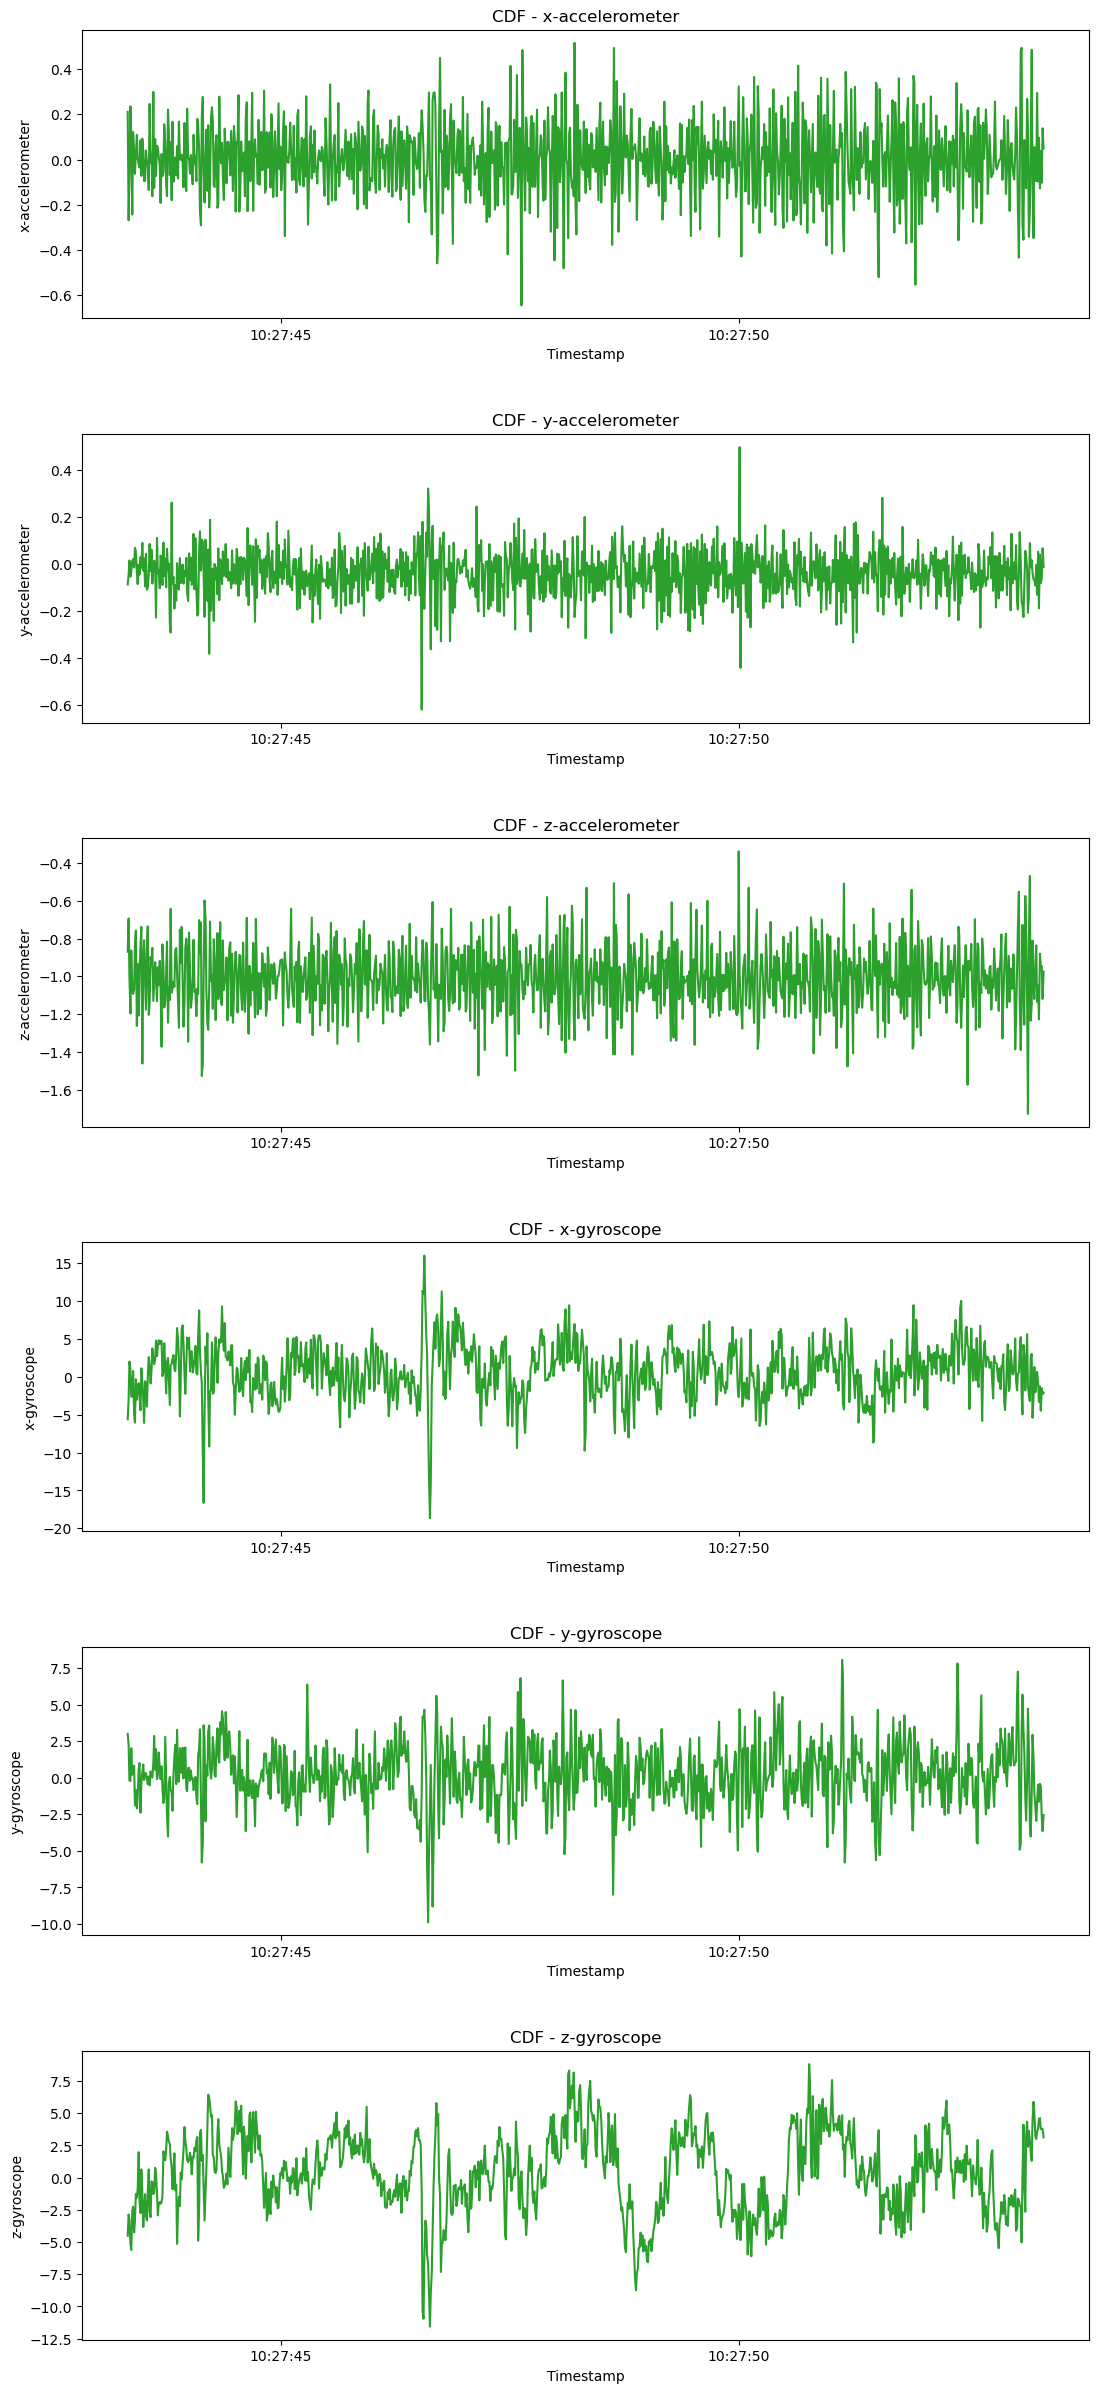

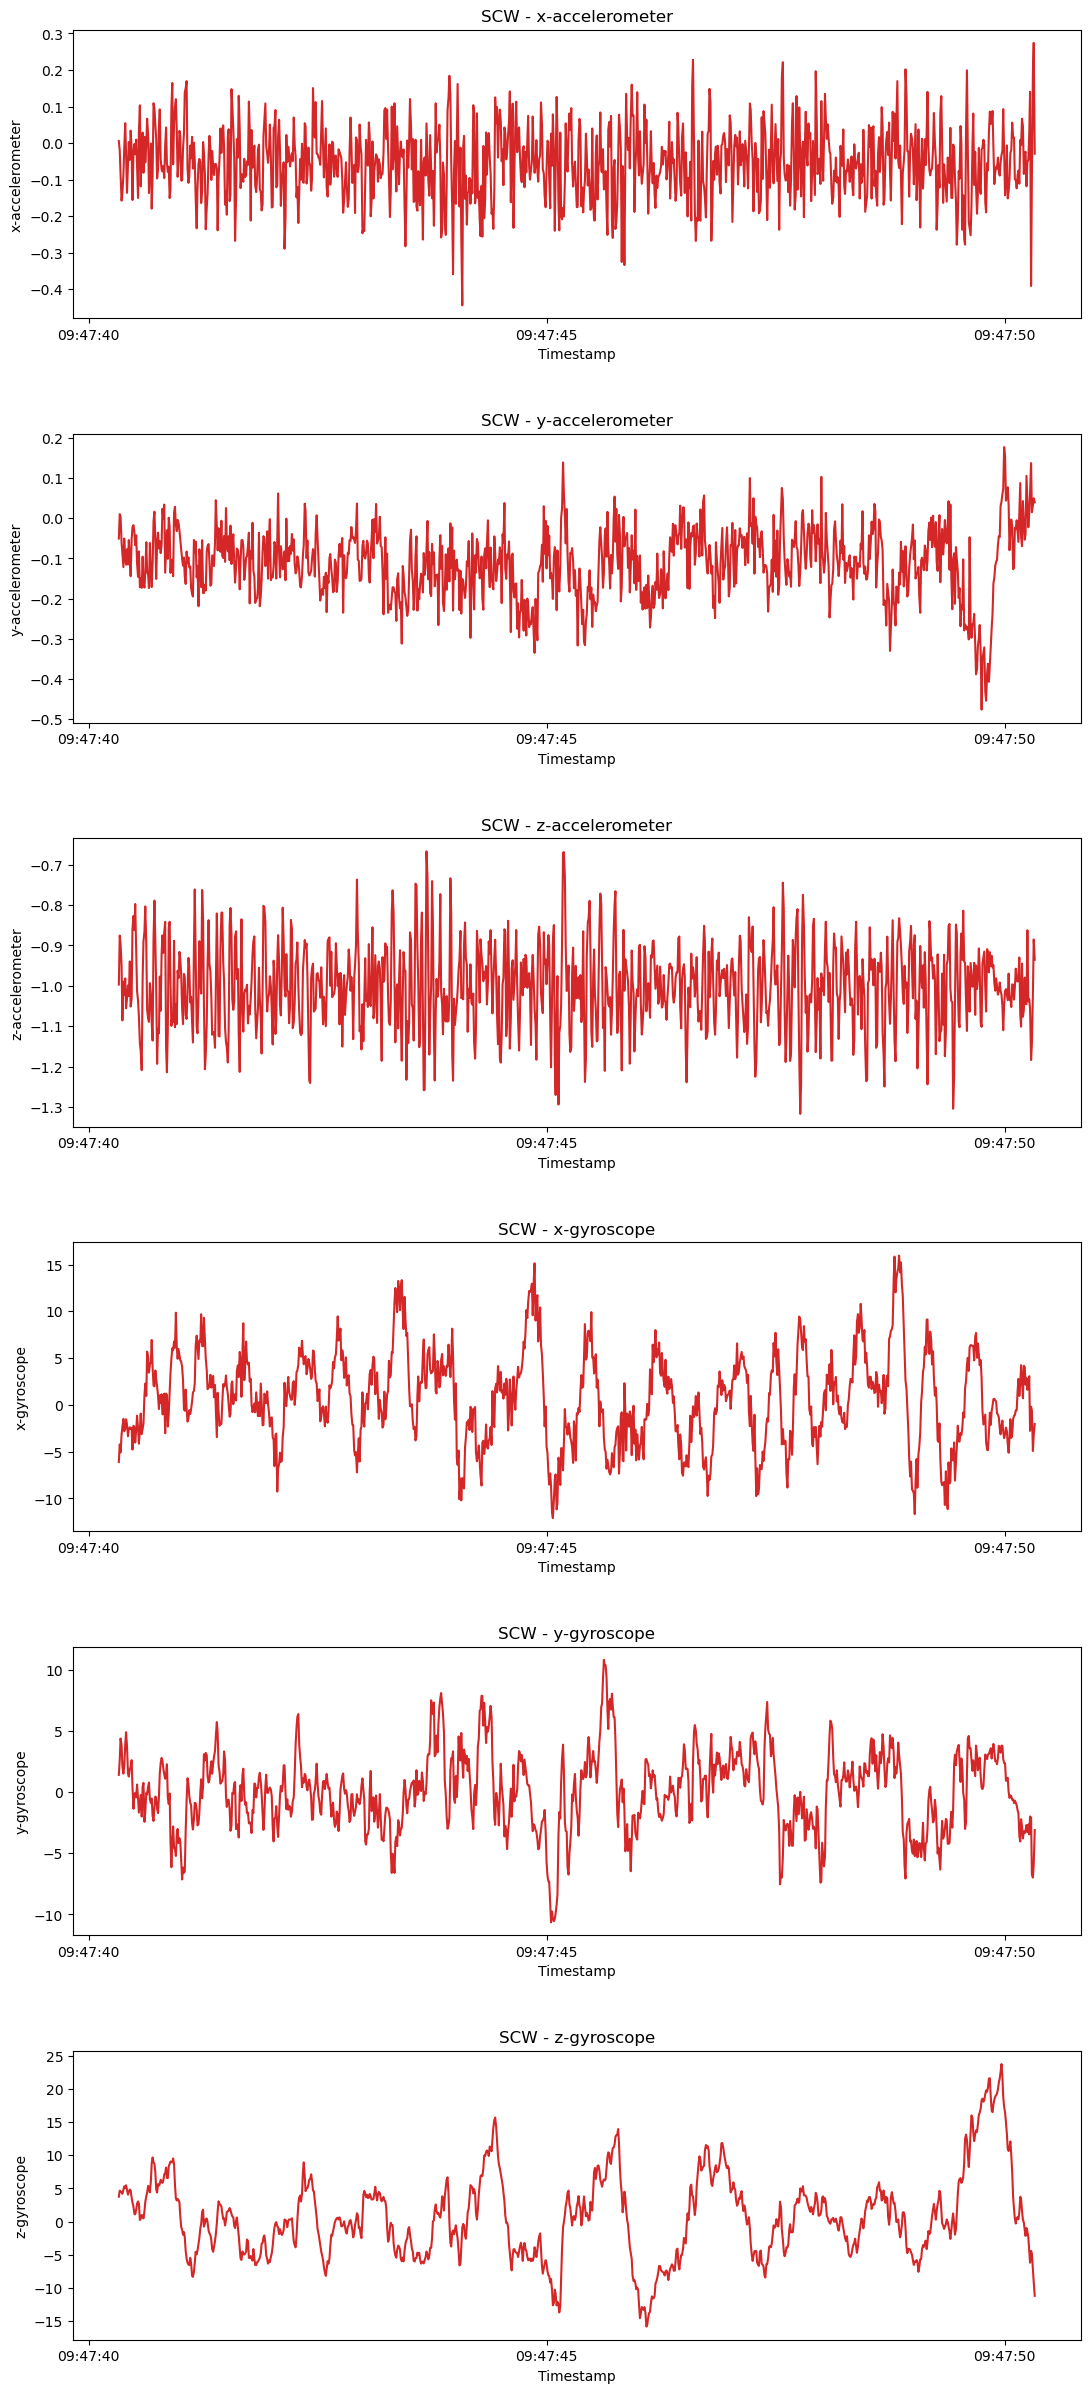

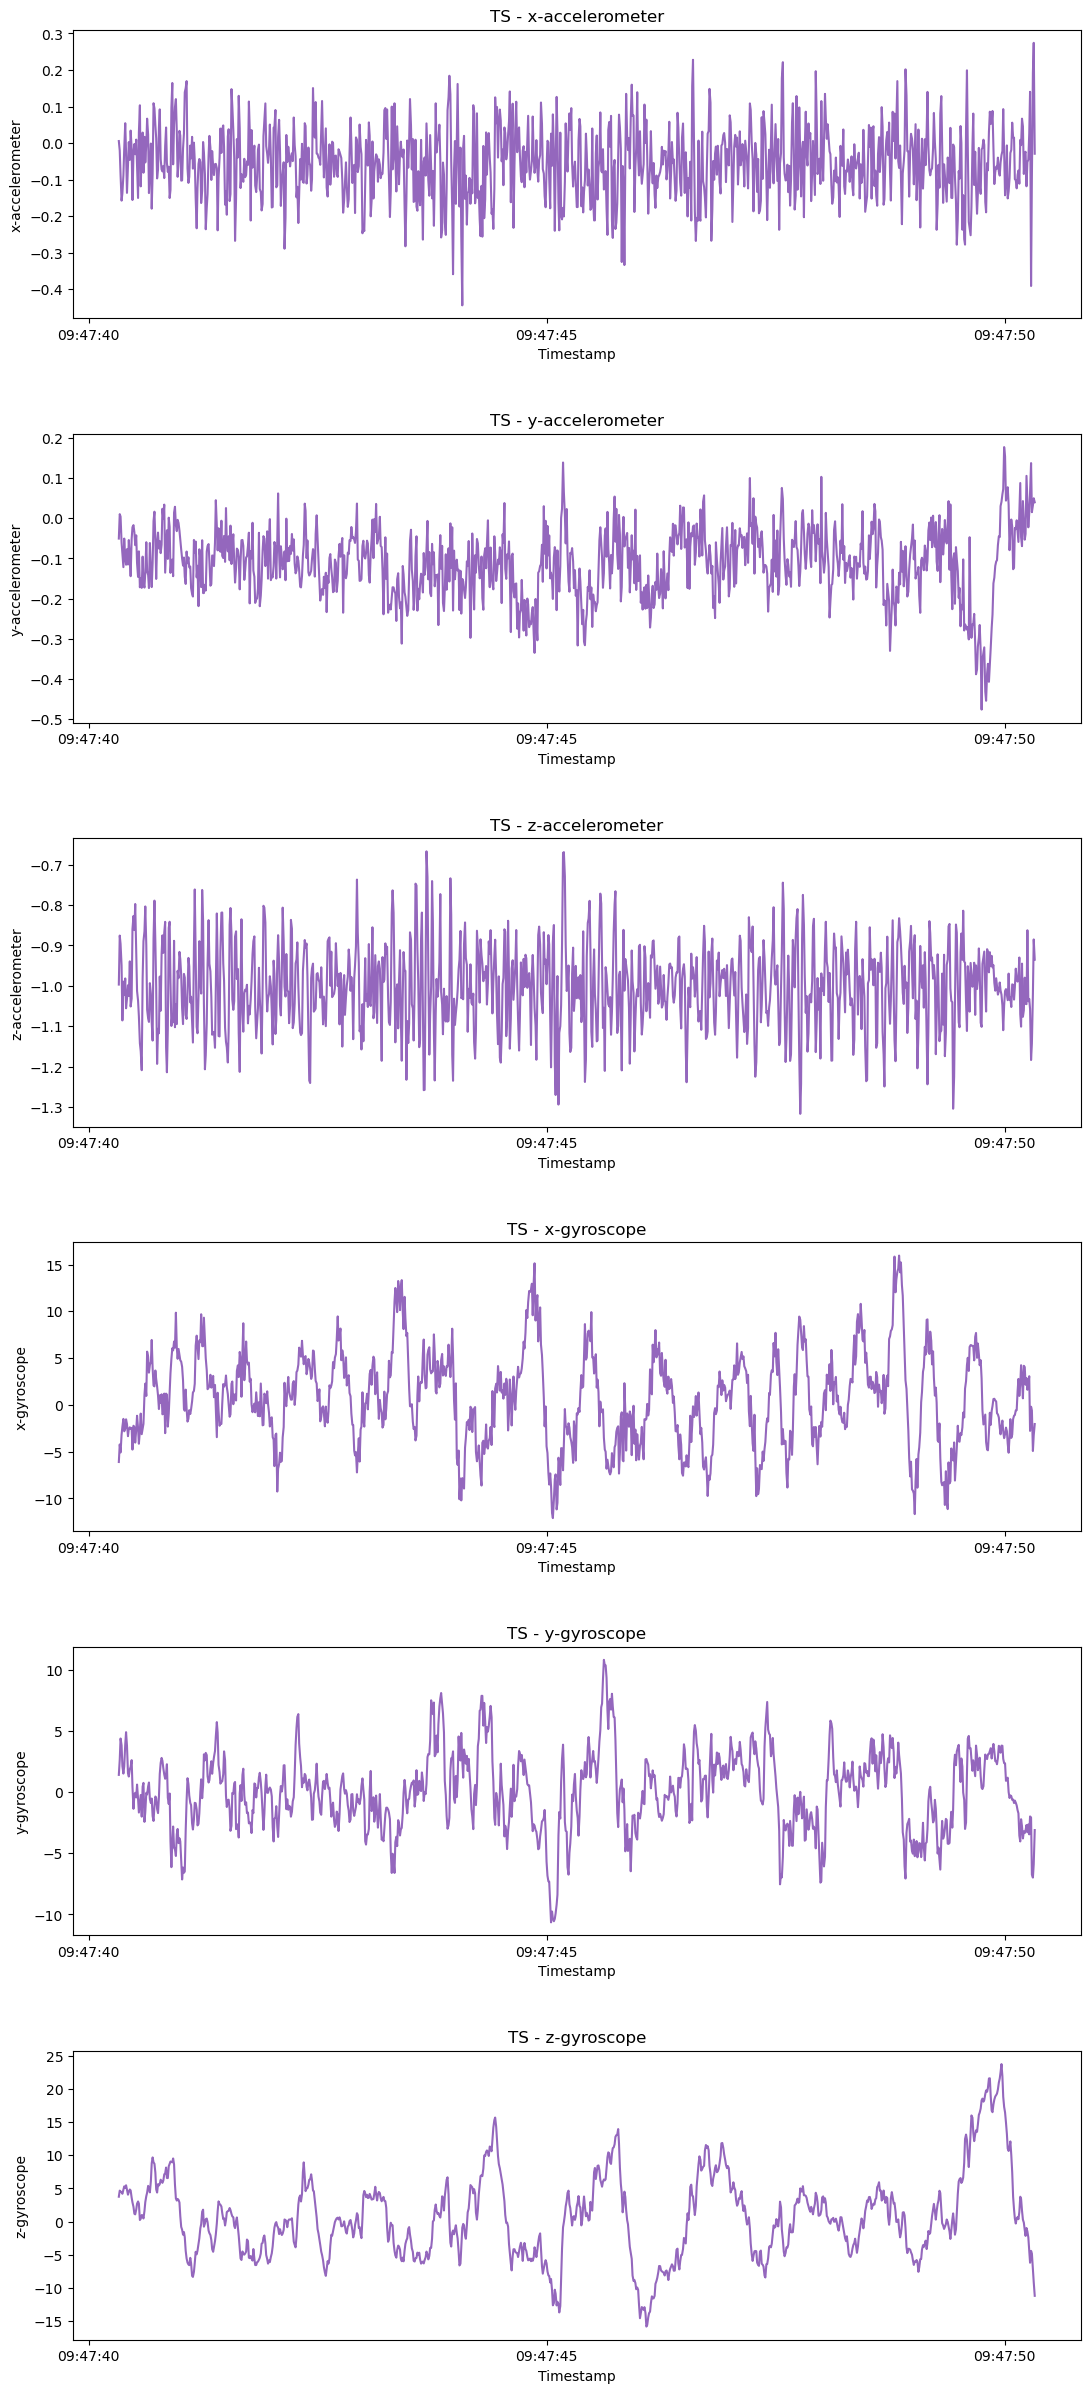

In [26]:
# All plots at once
import matplotlib # For defining color palette

color_palette = matplotlib.colormaps.get_cmap('tab10') # Define a color palette

for color_index, (table_name, table) in enumerate(dict_of_tables_10_seconds.items()):
    fig, ax = plt.subplots(6, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})
    
    for i, feature in enumerate(table.columns[1:], 0):  # Skipping the timestamp column:
        color = color_palette(color_index)  # Get color from the palette
        
        ax[i].plot(table['Timestamp'], table[feature], color=color)
        ax[i].set_title(f'{table_name} - {feature}')  # Adding table_name to the title
        ax[i].set_xlabel('Timestamp')
        ax[i].set_ylabel(feature)
    
    plt.show()


#### Section E-10 Box plot

In [27]:
print('The tables are:')
for item, key in dict_of_tables_10_seconds.items():
    print(item)


The tables are:
GSW
AFW
CDF
SCW
TS


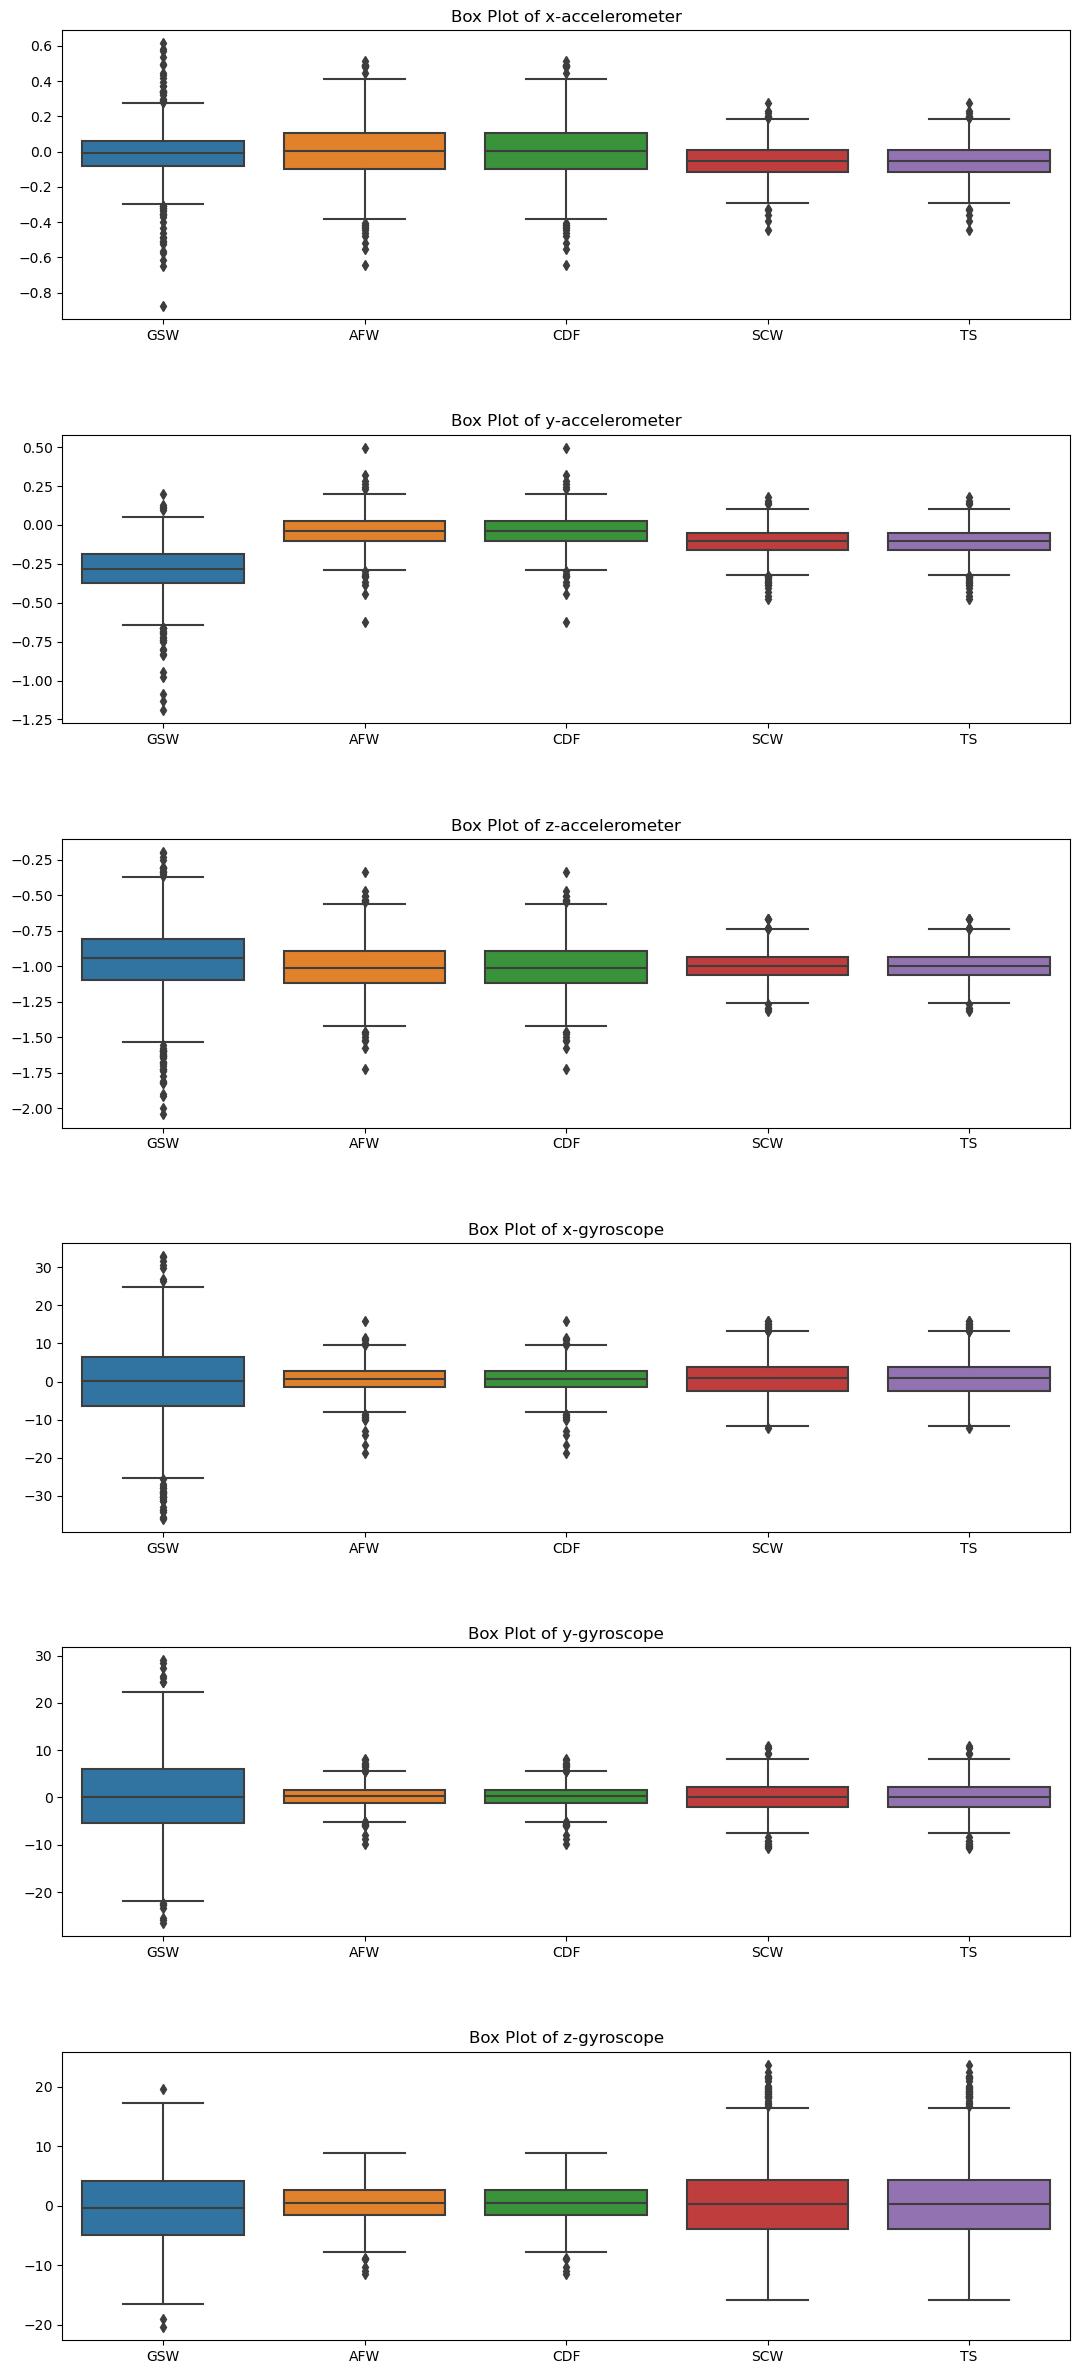

In [28]:
import seaborn as sns  # Importing seaborn for statistical visualization
# Creating a figure and a set of subplots with 6 rows and 1 column, adjusting the figure size and spacing between subplots
fig, ax = plt.subplots(6, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})

# Extracting the features to plot from the 'GSW' DataFrame
features_to_plot = dict_of_tables_10_seconds['GSW'].columns[1:]

# Iterating over each feature to plot
for i, feature in enumerate(features_to_plot, 0):
    
    # Creating a DataFrame containing the values of the current feature for each team
    data_to_plot = pd.DataFrame({'GSW': dict_of_tables_10_seconds['GSW'][feature],
                                 'AFW': dict_of_tables_10_seconds['AFW'][feature],
                                 'CDF': dict_of_tables_10_seconds['CDF'][feature],
                                 'SCW': dict_of_tables_10_seconds['SCW'][feature],
                                 'TS': dict_of_tables_10_seconds['TS'][feature]})
    
    # Creating a box plot for the current feature using seaborn, specifying the subplot for plotting
    sns.boxplot(data=data_to_plot, ax=ax[i])
    
    # Setting the x-axis ticks and labels to indicate the teams
    ax[i].set_xticks([0, 1, 2, 3, 4])
    ax[i].set_xticklabels(['GSW', 'AFW', 'CDF', 'SCW', 'TS'])
    
    # Setting the title for the subplot indicating the type of plot and the feature being plotted
    ax[i].set_title(f'Box Plot of {feature}')


## Section F - Data Preprocessing

#### Section F-1 Concatenation and annotation

In [29]:
# Initialize an empty list to store concatenated DataFrames
concatenated_dfs = []

# Iterate through the dictionary of tables
for table_name, table in dict_of_tables.items():
    # Add a new column 'label' with the table name
    table = table.copy() # Make a new copy to mute warnings 
    
    table.loc[:, 'Surface_Type'] = table_name
    # Append the DataFrame to the list
    concatenated_dfs.append(table)

# Concatenate all DataFrames in the list
concatenated_df = pd.concat(concatenated_dfs, ignore_index=True)



In [30]:
concatenated_df.sample(10) # take random 10 rows to check the labels

Timestamp  x-accelerometer  y-accelerometer  \
15088 2024-03-20 09:48:13.409        -0.025635        -0.041260   
3394  2024-03-20 10:27:56.930         0.009766         0.019043   
12615 2024-03-20 09:47:48.729        -0.032471        -0.182373   
9779  2024-03-20 10:28:12.039         0.093018        -0.079346   
7198  2024-03-20 10:27:46.279         0.051270        -0.058105   
4484  2024-03-20 10:28:07.809         0.468750        -0.158203   
9207  2024-03-20 10:28:06.329         0.081299        -0.028320   
4440  2024-03-20 10:28:07.369        -0.060791        -0.117920   
9742  2024-03-20 10:28:11.670         0.005371        -0.045166   
6577  2024-03-20 10:28:28.690        -0.000488        -0.068604   

       z-accelerometer  x-gyroscope  y-gyroscope  z-gyroscope Surface_Type  
15088        -1.124756     4.013062    -8.010864   -10.559081          SCW  
3394         -1.026367     2.487183    -1.205444     3.784179          AFW  
12615        -0.973633     1.998901     2.777099     0.793457          SCW  
9779         -0.813477    -0.793457    -2.899170     5.401611          CDF  
7198         -1.090088    -3.097534     0.061035    -1.770019          CDF  
4484         -1.142822     5.920410     2.243042    -4.623413          AFW  
9207         -0.969971     0.610352     0.595093     0.061035          CDF  
4440         -1.130615     0.045776    -0.167847     0.610352          AFW  
9742         -0.927002     4.333496     4.287720    -1.007080          CDF  
6577         -1.006104     0.350952    -0.228882    -0.076294          AFW

#### Section F-2 Merging Tables


##### Previously, we analyzed only a portion of the data collected by one team member. Now, we will combine all the data gathered by every team member for our analysis.

In [31]:
# Grass Slopy Wet Surface DataFrame
GSW = pd.read_csv('../datasets/final/GSW.csv')

# Asphalt Flat Wet Surface DataFrame
AFW = pd.read_csv('../datasets/final/AFW.csv') 

# Concerete Dry Flat Surface DataFrame
CFD = pd.read_csv('../datasets/final/CFD.csv') 

# Stones Coarse Wet Surface DataFrame
SCW = pd.read_csv('../datasets/final/SCW.csv')

# Tile Smooth Surface DataFrame
TS = pd.read_csv('../datasets/final/TS.csv')

In [32]:
# Defining the dictionary of tables we have to easily access them later on

# Dictionary = {'key':'Item'}
dict_of_completed_tables = {'GSW': GSW, 'AFW': AFW, 'CFD': CFD, 'SCW': SCW, 'TS': TS}

In [33]:
# concatenate all tables tegother

masterList = []

for table_name, table in dict_of_completed_tables.items():
    masterList.append(table)

# dict_of_completed_tables['TS']

In [34]:
masterTable = pd.concat(masterList, ignore_index=True)
masterTable

x accelerometer  y accelerometer  z accelerometer    x gyro    y gyro  \
0            -0.028809        -0.299805        -0.958252  1.281738  1.068115   
1            -0.016357        -0.300293        -0.949219  1.373291  0.991821   
2            -0.023438        -0.287109        -0.953125  1.068115  0.717163   
3            -0.027832        -0.287354        -0.948730  0.839233  0.335693   
4             0.001465        -0.277832        -0.946533  0.946045  0.183105   
...                ...              ...              ...       ...       ...   
72726         0.016602        -0.080322        -0.970215  1.251221  0.396728   
72727        -0.008789        -0.092773        -1.009033  1.617432  0.656128   
72728         0.013428        -0.066162        -0.994141  1.907349  0.717163   
72729        -0.018311        -0.072998        -1.035645  1.754761  0.686645   
72730        -0.002197        -0.045898        -1.023193  1.922607  0.106812   

         z gyro surface  
0      4.928589   grass  
1      5.004883   grass  
2      4.745483   grass  
3      4.699707   grass  
4      4.608154   grass  
...         ...     ...  
72726  2.548218    tile  
72727  3.036499    tile  
72728  3.158569    tile  
72729  2.975464    tile  
72730  3.265381    tile  

[72731 rows x 7 columns]

#### Section F-3 Checking consistency

In [35]:
# checking if there is missing value
masterTable.isna().sum()

x accelerometer    0
y accelerometer    0
z accelerometer    0
x gyro             0
y gyro             0
z gyro             0
surface            0
dtype: int64

`The dataset does not include any missing values.`

#### Section F - 4 Exploring Values Distribution

In [36]:
masterTable.describe()

x accelerometer  y accelerometer  z accelerometer        x gyro  \
count     72731.000000     72731.000000     72731.000000  72731.000000   
mean         -0.018446        -0.091302        -1.000986      0.629918   
std           0.110704         0.122685         0.127179      5.379880   
min          -0.909912        -1.190186        -2.301758    -54.412838   
25%          -0.079102        -0.139404        -1.061279     -1.007080   
50%          -0.017334        -0.069092        -1.001465      0.747681   
75%           0.038086        -0.018066        -0.937744      2.593994   
max           1.026123         0.534912        -0.100342     38.436890   

             y gyro        z gyro  
count  72731.000000  72731.000000  
mean       0.248119      0.074384  
std        3.751903      6.441651  
min      -35.552979    -66.802979  
25%       -0.976562     -2.288818  
50%        0.244141      0.030518  
75%        1.480102      2.441406  
max       47.164913     81.130974

`We noticed that there are variability in the distribution of numerical features`

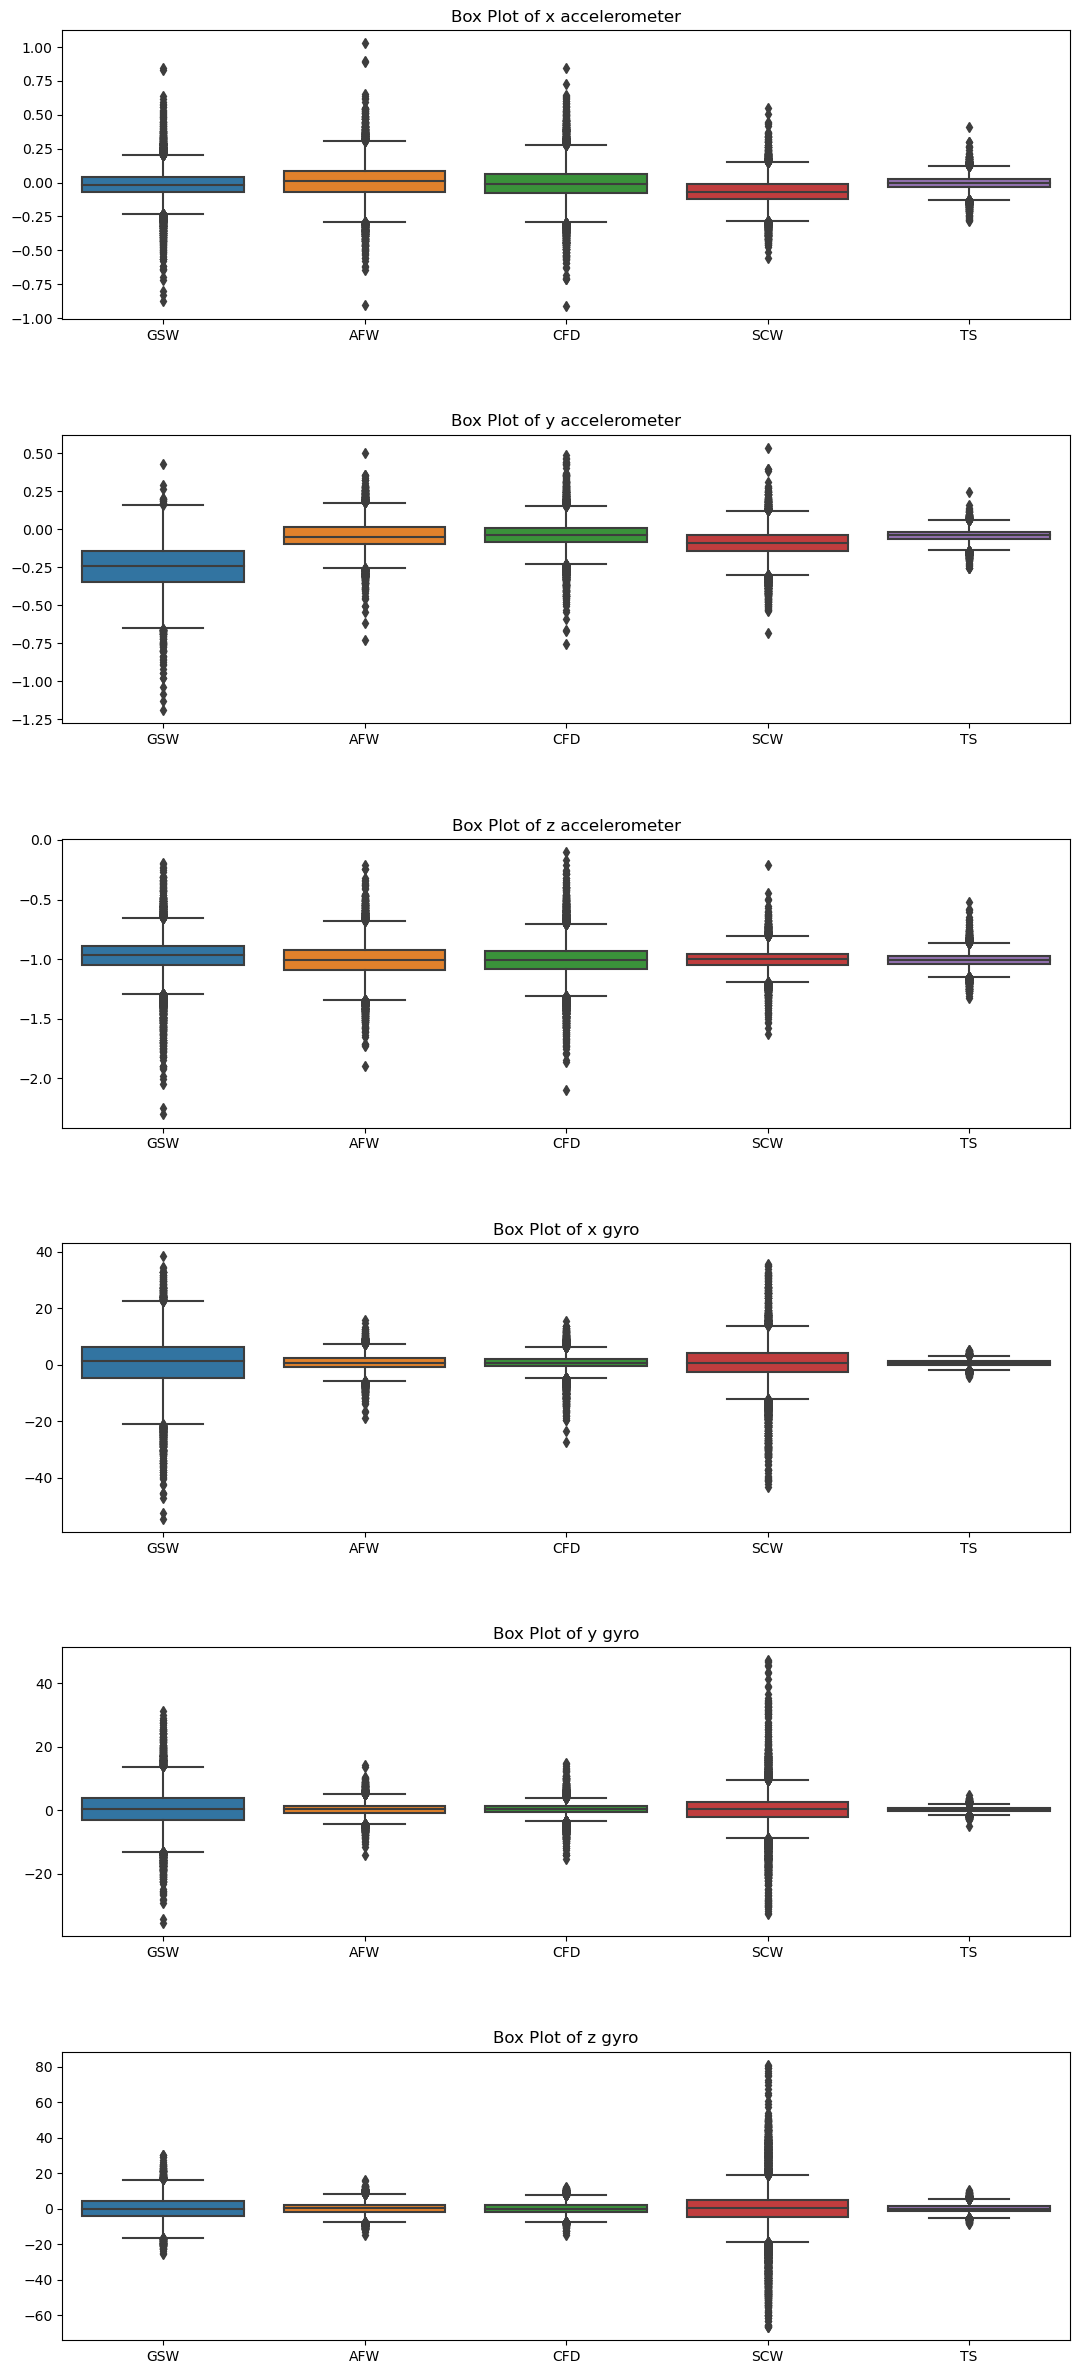

In [37]:
# Creating a figure and a set of subplots with 6 rows and 1 column, adjusting the figure size and spacing between subplots
fig, ax = plt.subplots(6, 1, figsize=(13, 30), gridspec_kw={'hspace': 0.4})

# Extracting the features to plot from the 'GSW' DataFrame
features_to_plot = dict_of_completed_tables['GSW'].columns[:6] # SLIGHT MODIFICATION HERE

# Iterating over each feature to plot
for i, feature in enumerate(features_to_plot, 0):
    
    # Creating a DataFrame containing the values of the current feature for each team
    data_to_plot = pd.DataFrame({'GSW': dict_of_completed_tables['GSW'][feature],
                                 'AFW': dict_of_completed_tables['AFW'][feature],
                                 'CFD': dict_of_completed_tables['CFD'][feature],
                                 'SCW': dict_of_completed_tables['SCW'][feature],
                                 'TS': dict_of_completed_tables['TS'][feature]})
    
    # Creating a box plot for the current feature using seaborn, specifying the subplot for plotting
    sns.boxplot(data=data_to_plot, ax=ax[i])
    
    # Setting the x-axis ticks and labels to indicate the teams
    ax[i].set_xticks([0, 1, 2, 3, 4])
    ax[i].set_xticklabels(['GSW', 'AFW', 'CFD', 'SCW', 'TS'])
    
    # Setting the title for the subplot indicating the type of plot and the feature being plotted
    ax[i].set_title(f'Box Plot of {feature}')


`1 - We observe that the independent features have varying scales. Therefore, we will utilize scaling techniques to address this variability.`

`2 - We notice that the values consist of both negative and positive values, indicating that scaling using the StandardScaler is preferable over MinMax Scaling.`

`3 - The axes of the gyroscope exhibit larger standard deviations, suggesting that these features may have strong predictability for the target feature.`

#### Section F - 5 Exploring Clusters for all dimensions 

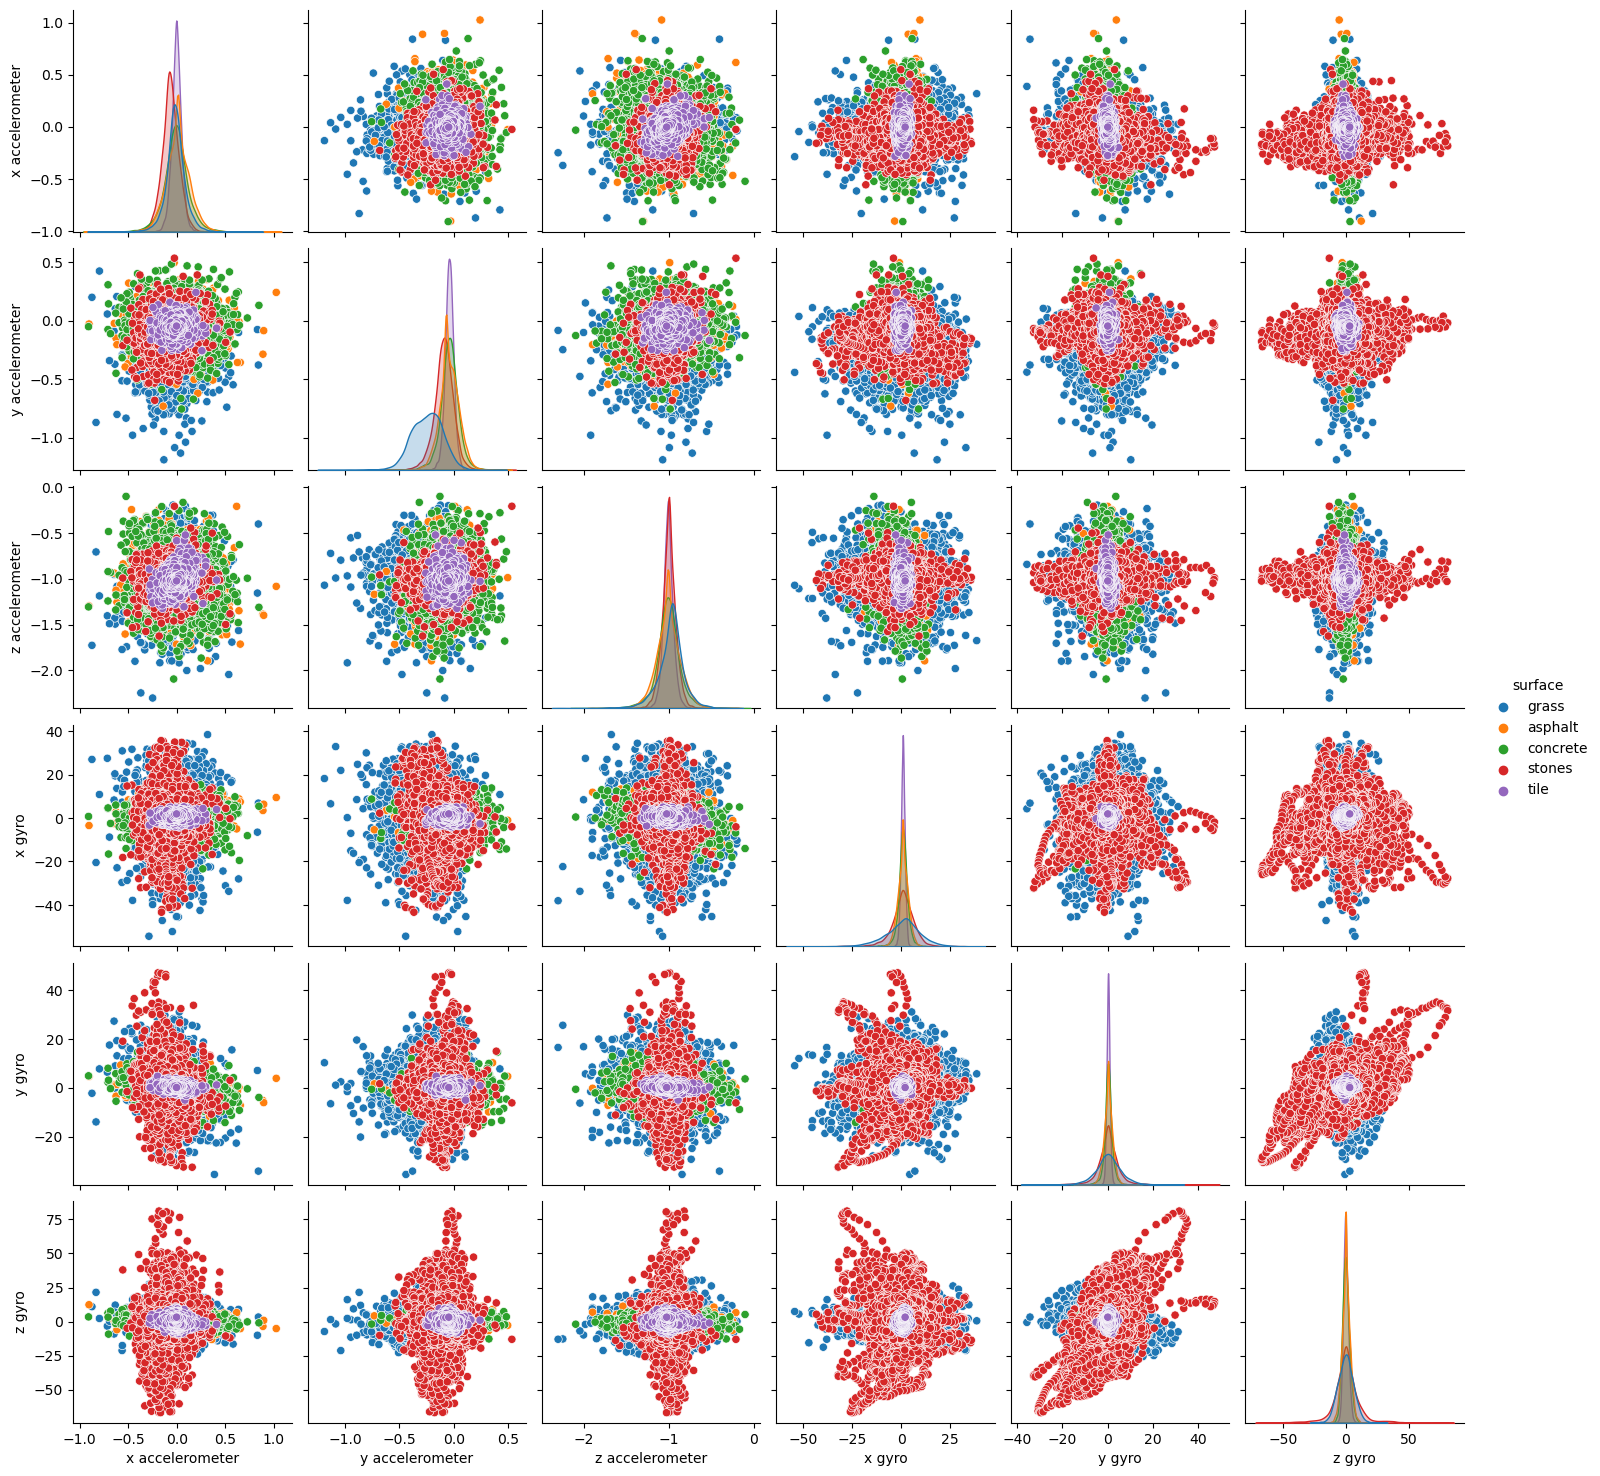

In [38]:
# see the distribtuion of features for each class (Surface)
import seaborn as sns # (if needed)
sns.pairplot(masterTable, hue='surface')
plt.show()


`The pairplot demonstrates distinguishable patterns between the different classes, indicating that applying classification using machine learning is possible. However, it's noteworthy that the asphalt class does not exhibit a unique pattern that is distinctly different from the other classes`

#### Section F - 6 Exploring Clusters for on 2-D dimensions using PCA

In [39]:
# Take a copy to do clustering analysis using Principal component analysis
Cluster_data = masterTable.copy()

In [40]:
# calling the cluster data we copied eariler
Cluster_data

x accelerometer  y accelerometer  z accelerometer    x gyro    y gyro  \
0            -0.028809        -0.299805        -0.958252  1.281738  1.068115   
1            -0.016357        -0.300293        -0.949219  1.373291  0.991821   
2            -0.023438        -0.287109        -0.953125  1.068115  0.717163   
3            -0.027832        -0.287354        -0.948730  0.839233  0.335693   
4             0.001465        -0.277832        -0.946533  0.946045  0.183105   
...                ...              ...              ...       ...       ...   
72726         0.016602        -0.080322        -0.970215  1.251221  0.396728   
72727        -0.008789        -0.092773        -1.009033  1.617432  0.656128   
72728         0.013428        -0.066162        -0.994141  1.907349  0.717163   
72729        -0.018311        -0.072998        -1.035645  1.754761  0.686645   
72730        -0.002197        -0.045898        -1.023193  1.922607  0.106812   

         z gyro surface  
0      4.928589   grass  
1      5.004883   grass  
2      4.745483   grass  
3      4.699707   grass  
4      4.608154   grass  
...         ...     ...  
72726  2.548218    tile  
72727  3.036499    tile  
72728  3.158569    tile  
72729  2.975464    tile  
72730  3.265381    tile  

[72731 rows x 7 columns]

In [41]:
Cluster_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72731 entries, 0 to 72730
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x accelerometer  72731 non-null  float64
 1   y accelerometer  72731 non-null  float64
 2   z accelerometer  72731 non-null  float64
 3   x gyro           72731 non-null  float64
 4   y gyro           72731 non-null  float64
 5   z gyro           72731 non-null  float64
 6   surface          72731 non-null  object 
dtypes: float64(6), object(1)
memory usage: 3.9+ MB


In [42]:
from sklearn.preprocessing import StandardScaler # to unify the scales of the columns
from sklearn.decomposition import PCA # To reduce data into 2-d dimensions only

from sklearn.cluster import KMeans # to cluster the data 
import matplotlib.pyplot as plt # to plotting

In [43]:
# Standardize the data
numerical_columns = Cluster_data.drop('surface', axis=1) # Exclude the label column from scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_columns)  # To unify the impact of each column

In [44]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2) # reducing data into 2-d dimension 
pca_data = pca.fit_transform(scaled_data)

In [45]:
# Apply k-means clustering
kmeans = KMeans(n_clusters=6)  # setting number of clusters to 6 
kmeans.fit(pca_data)
clusters = kmeans.predict(pca_data)


/Users/bushrajalali/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [46]:
labels = Cluster_data['surface'] # the array of labels that will be used to highlight the cluster plots
unique_labels = labels.unique()

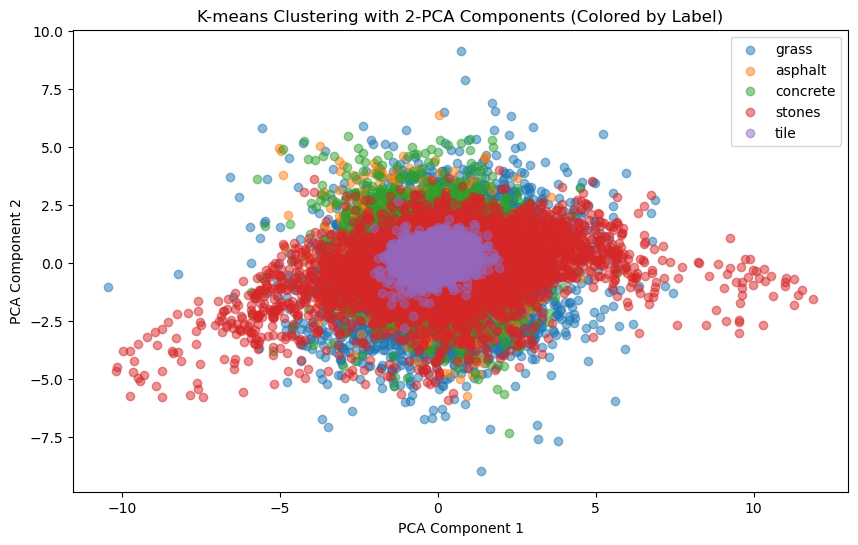

In [46]:
# Plot the clustered data with colors based on the label column

# Create a new figure for the plot
plt.figure(figsize=(10, 6))

# Iterate over each unique label
for label in unique_labels:
    # Select the data points corresponding to the current label and plot them
    plt.scatter(pca_data[labels == label, 0], pca_data[labels == label, 1], label=label, alpha=0.5)

# Set the title and axis labels for the plot
plt.title('K-means Clustering with 2-PCA Components (Colored by Label)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Display the legend to show the mapping between labels and colors
plt.legend()

# Show the plot
plt.show()


#### section F-7 studying the dependent feature

In [49]:
masterTable.surface.value_counts()

stones      16224
asphalt     15982
concrete    14802
grass       13343
tile        12380
Name: surface, dtype: int64

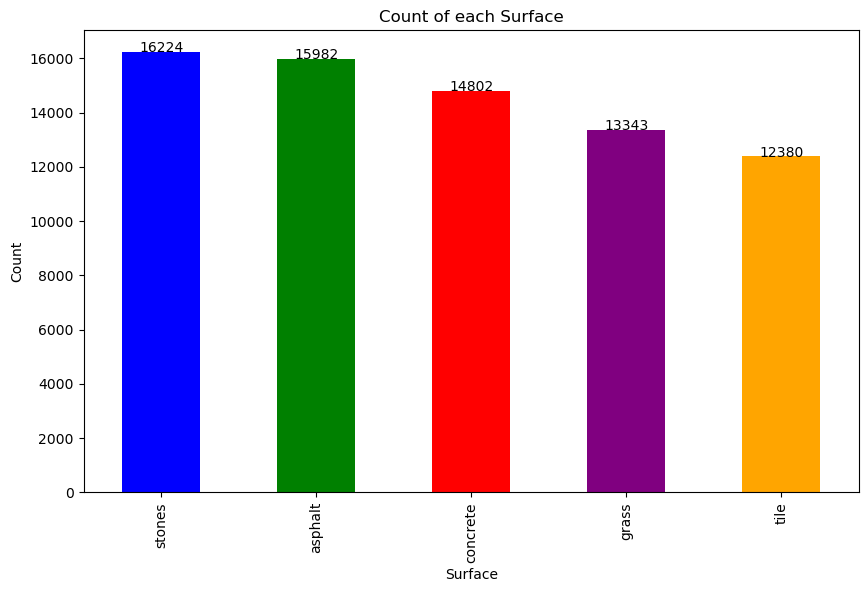

In [50]:
# masterTable.surface.value_counts() returns a Series with surface names as index and their counts as values
counts = masterTable.surface.value_counts()

# Define colors for each surface
colors = ['blue', 'green', 'red', 'purple', 'orange']  

# Plotting
plt.figure(figsize=(10, 6))  # Adjusting figure size
counts.plot(kind='bar', color=colors)

# Adding labels and title
plt.xlabel('Surface')
plt.ylabel('Count')
plt.title('Count of each Surface')

# Adding total count on top of each bar
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center')

# Show plot
plt.show()


`The distribution of target feature is almost balanced, which is a good indicator that there is no need to use re-balancing techniques`

#### Section F - 8 Aggregating numerical features using sliding window technique 

In [51]:
window_data = masterTable.copy()
window_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72731 entries, 0 to 72730
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   x accelerometer  72731 non-null  float64
 1   y accelerometer  72731 non-null  float64
 2   z accelerometer  72731 non-null  float64
 3   x gyro           72731 non-null  float64
 4   y gyro           72731 non-null  float64
 5   z gyro           72731 non-null  float64
 6   surface          72731 non-null  object 
dtypes: float64(6), object(1)
memory usage: 3.9+ MB


In [52]:
# Define the window size
window_size = 100

# Initialize an empty list to store the rolling metric tables for each surface
rolling_metric_tables = []

# Get unique surfaces
unique_surfaces = window_data['surface'].unique()


In [53]:
# Loop through each surface
for surface in unique_surfaces:
    # Filter data for the current surface
    surface_data = window_data[window_data['surface'] == surface]
    
    # Calculate rolling mean, std, and skewness for numeric columns for the current surface
    rolling_metrics_surface = surface_data.drop(columns='surface').rolling(window=window_size).agg(['mean', 'std', lambda x: pd.Series(x).skew(), lambda x: pd.Series(x).kurt()])
    
    
    # Add a new column containing the surface name
    rolling_metrics_surface['surface'] = surface
    
    # Append the rolling metric table for the current surface to the list
    rolling_metric_tables.append(rolling_metrics_surface)




In [54]:
# Concatenate the rolling metric tables for all surfaces
rolling_metrics_all_surfaces = pd.concat(rolling_metric_tables)

# Display the resulting DataFrame
display(rolling_metrics_all_surfaces)

x accelerometer                               y accelerometer            \
                 mean       std  <lambda>  <lambda>            mean       std   
0                 NaN       NaN       NaN       NaN             NaN       NaN   
1                 NaN       NaN       NaN       NaN             NaN       NaN   
2                 NaN       NaN       NaN       NaN             NaN       NaN   
3                 NaN       NaN       NaN       NaN             NaN       NaN   
4                 NaN       NaN       NaN       NaN             NaN       NaN   
...               ...       ...       ...       ...             ...       ...   
72726       -0.006641  0.022679  0.363796  0.595992       -0.048196  0.018439   
72727       -0.006648  0.022679  0.364750  0.596105       -0.048774  0.018919   
72728       -0.006230  0.022661  0.325434  0.578814       -0.048645  0.018753   
72729       -0.005952  0.022334  0.358965  0.670190       -0.049260  0.018529   
72730       -0.005740  0.022267  0.338057  0.697656       -0.049365  0.018480   

                          z accelerometer            ...    x gyro    y gyro  \
       <lambda>  <lambda>            mean       std  ...  <lambda>      mean   
0           NaN       NaN             NaN       NaN  ...       NaN       NaN   
1           NaN       NaN             NaN       NaN  ...       NaN       NaN   
2           NaN       NaN             NaN       NaN  ...       NaN       NaN   
3           NaN       NaN             NaN       NaN  ...       NaN       NaN   
4           NaN       NaN             NaN       NaN  ...       NaN       NaN   
...         ...       ...             ...       ...  ...       ...       ...   
72726  0.496528  0.371466       -1.006924  0.025051  ... -0.662806  0.316925   
72727  0.414906  0.407719       -1.006917  0.025050  ... -0.662806  0.308990   
72728  0.440277  0.454896       -1.006458  0.024857  ... -0.658677  0.297546   
72729  0.451507  0.543159       -1.006846  0.025007  ... -0.659695  0.285644   
72730  0.468259  0.589882       -1.006921  0.025046  ... -0.648721  0.272369   

                                       z gyro                                \
            std  <lambda>  <lambda>      mean       std  <lambda>  <lambda>   
0           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...         ...       ...       ...       ...       ...       ...       ...   
72726  0.588165  0.349372  0.096131 -0.204926  2.136873  0.345427 -1.369215   
72727  0.577995  0.334685  0.187534 -0.140228  2.136085  0.324659 -1.412555   
72728  0.557925  0.216842  0.061011 -0.075378  2.136817  0.303486 -1.451184   
72729  0.536165  0.052828 -0.198079 -0.012970  2.133842  0.279761 -1.490298   
72730  0.523727  0.025134 -0.162759  0.053406  2.131527  0.263160 -1.529788   

      surface  
               
0       grass  
1       grass  
2       grass  
3       grass  
4       grass  
...       ...  
72726    tile  
72727    tile  
72728    tile  
72729    tile  
72730    tile  

[72731 rows x 25 columns]

In [55]:
# data = rolling_metrics_all_surfaces.copy()

In [56]:
# rolling_metrics_all_surfaces = data.copy()

In [57]:
rolling_metrics_all_surfaces.columns

MultiIndex([('x accelerometer',     'mean'),
            ('x accelerometer',      'std'),
            ('x accelerometer', '<lambda>'),
            ('x accelerometer', '<lambda>'),
            ('y accelerometer',     'mean'),
            ('y accelerometer',      'std'),
            ('y accelerometer', '<lambda>'),
            ('y accelerometer', '<lambda>'),
            ('z accelerometer',     'mean'),
            ('z accelerometer',      'std'),
            ('z accelerometer', '<lambda>'),
            ('z accelerometer', '<lambda>'),
            (         'x gyro',     'mean'),
            (         'x gyro',      'std'),
            (         'x gyro', '<lambda>'),
            (         'x gyro', '<lambda>'),
            (         'y gyro',     'mean'),
            (         'y gyro',      'std'),
            (         'y gyro', '<lambda>'),
            (         'y gyro', '<lambda>'),
            (         'z gyro',     'mean'),
            (         'z gyro',      'std'),
          

In [58]:
# Rename columns for clarity
rolling_metrics_all_surfaces.columns = [f"{col}_{stat}" for col, stat in rolling_metrics_surface.columns]

In [59]:
rolling_metrics_all_surfaces.columns

Index(['x accelerometer_mean', 'x accelerometer_std',
       'x accelerometer_<lambda>', 'x accelerometer_<lambda>',
       'y accelerometer_mean', 'y accelerometer_std',
       'y accelerometer_<lambda>', 'y accelerometer_<lambda>',
       'z accelerometer_mean', 'z accelerometer_std',
       'z accelerometer_<lambda>', 'z accelerometer_<lambda>', 'x gyro_mean',
       'x gyro_std', 'x gyro_<lambda>', 'x gyro_<lambda>', 'y gyro_mean',
       'y gyro_std', 'y gyro_<lambda>', 'y gyro_<lambda>', 'z gyro_mean',
       'z gyro_std', 'z gyro_<lambda>', 'z gyro_<lambda>', 'surface_'],
      dtype='object')

In [60]:
# renaming columns for futher clarity
rolling_metrics_all_surfaces.columns.values[2] = 'x accelerometer_Skewness'
rolling_metrics_all_surfaces.columns.values[3] = 'x accelerometer_kortsosis'
rolling_metrics_all_surfaces.columns.values[6] = 'y accelerometer_Skewness'
rolling_metrics_all_surfaces.columns.values[7] = 'y accelerometer_kortsosis'
rolling_metrics_all_surfaces.columns.values[10] = 'z accelerometer_Skewness'
rolling_metrics_all_surfaces.columns.values[11] = 'z accelerometer_kortsosis'
rolling_metrics_all_surfaces.columns.values[14] = 'x gyro_Skewness'
rolling_metrics_all_surfaces.columns.values[15] = 'x gyro_kortsosis'
rolling_metrics_all_surfaces.columns.values[18] = 'y gyro_Skewness'
rolling_metrics_all_surfaces.columns.values[19] = 'y gyro_kortsosis'
rolling_metrics_all_surfaces.columns.values[22] = 'z gyro_Skewness'
rolling_metrics_all_surfaces.columns.values[23] = 'z gyro_kortsosis'
rolling_metrics_all_surfaces.columns.values[24] = 'surface'



In [61]:
rolling_metrics_all_surfaces.columns

Index(['x accelerometer_mean', 'x accelerometer_std',
       'x accelerometer_Skewness', 'x accelerometer_kortsosis',
       'y accelerometer_mean', 'y accelerometer_std',
       'y accelerometer_Skewness', 'y accelerometer_kortsosis',
       'z accelerometer_mean', 'z accelerometer_std',
       'z accelerometer_Skewness', 'z accelerometer_kortsosis', 'x gyro_mean',
       'x gyro_std', 'x gyro_Skewness', 'x gyro_kortsosis', 'y gyro_mean',
       'y gyro_std', 'y gyro_Skewness', 'y gyro_kortsosis', 'z gyro_mean',
       'z gyro_std', 'z gyro_Skewness', 'z gyro_kortsosis', 'surface'],
      dtype='object')

In [62]:
rolling_metrics_all_surfaces.surface.value_counts()

stones      16224
asphalt     15982
concrete    14802
grass       13343
tile        12380
Name: surface, dtype: int64

In [63]:
rolling_metrics_all_surfaces.dropna(inplace = True) # Removing NA rows 

In [64]:
rolling_metrics_all_surfaces.surface.value_counts()

stones      16125
asphalt     15883
concrete    14703
grass       13244
tile        12281
Name: surface, dtype: int64

In [ ]:
# see the distribtuion of features for each class (Surface) dont run this code please it will take 3 hours :)
#import seaborn as sns # (if needed)
#sns.pairplot(rolling_metrics_all_surfaces, hue='surface')
#plt.show()


In [ ]:
# ## Why we have NA rows
# # Create a DataFrame
# data = {'value': [1, 2, 3, 4, 5]}
# df = pd.DataFrame(data)





In [73]:
# df

In [171]:
# # Calculate the rolling mean with window size 3
# rolling_mean = df['value'].rolling(window=4).mean()

# rolling_mean

#### Section F - 10 Regular Dataset Mapping target feature (Label-Encoding classes)

In [65]:
# Define the mapping
label_mapping = {
    'tile': 0,
    'grass': 1,
    'asphalt': 2,
    'concrete': 3,
    'stones': 4
}

# Map the labels using the dictionary
masterTable['Encoded_Surface'] = masterTable['surface'].map(label_mapping)

# Display the DataFrame with the new encoded labels
masterTable.sample(5)


x accelerometer  y accelerometer  z accelerometer     x gyro    y gyro  \
24185        -0.058594        -0.176758        -0.965088  -1.373291 -0.854492   
23052         0.009521        -0.091309        -1.135498   1.998901  1.876831   
54192        -0.044678         0.042725        -0.997314   1.342773 -2.288818   
55117        -0.218262        -0.316895        -0.950439  17.639160 -2.639770   
24921        -0.445557        -0.006348        -1.096191   1.449585  1.632690   

          z gyro  surface  Encoded_Surface  
24185  -2.899170  asphalt                2  
23052  -0.579834  asphalt                2  
54192 -20.828245   stones                4  
55117  -7.629394   stones                4  
24921   3.479004  asphalt                2

In [66]:
# Chkecing that value counts matches
masterTable.Encoded_Surface.value_counts()

4    16224
2    15982
3    14802
1    13343
0    12380
Name: Encoded_Surface, dtype: int64

In [67]:
masterTable.surface.value_counts()

stones      16224
asphalt     15982
concrete    14802
grass       13343
tile        12380
Name: surface, dtype: int64

In [68]:
# now we can remove the string lable 'Surface'
masterTable.drop('surface', axis =1 , inplace = True)

#### Section F - 11 Regular Dataset checking multicollinearity

In [69]:
###
data = masterTable.copy()
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values) # The lower triangle

# Make the unused values NaNs
corr_array = np.array(corr_values) # Changing the df to an array
corr_array[tril_index] = np.nan # Assigning the lower traingle to nan
    
# Recreate Pandas correlation data frame
corr_values = pd.DataFrame(corr_array,columns = corr_values.columns, index= corr_values.index)

# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   feature1         15 non-null     object 
 1   feature2         15 non-null     object 
 2   correlation      15 non-null     float64
 3   abs_correlation  15 non-null     float64
dtypes: float64(2), object(2)
memory usage: 612.0+ bytes


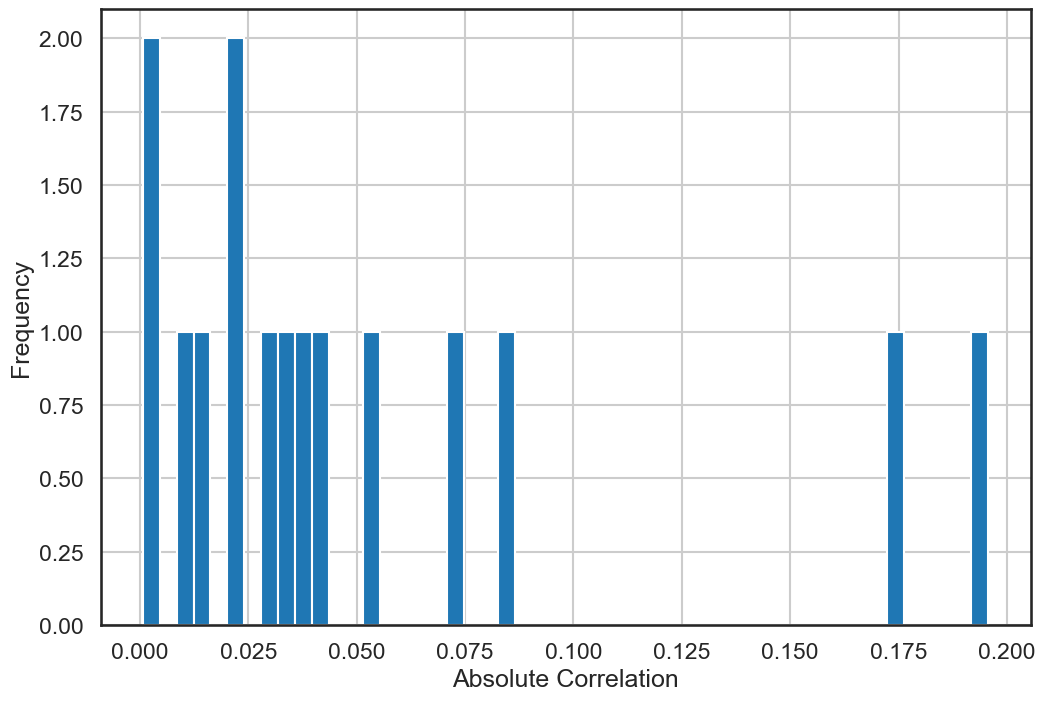

In [70]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

`We have observed that there is no multicollinearity among the features. This finding indicates that we can confidently utilize all the features in the prediction process."`

#### Section F - 12 Regular Dataset Machine Learning

In [71]:
from sklearn.model_selection import train_test_split # to split data into training and testing test 

# Split the data into features (X) and target labels (y)
X = masterTable.drop('Encoded_Surface', axis = 1) # independent features 
y = masterTable['Encoded_Surface'] # dependent feature 

# Split the data into training (75%) and test (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (54548, 6) (54548,)
Test set shape: (18183, 6) (18183,)


In [72]:
# Scaling independent features 
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the first few rows of the scaled training data to verify the transformation
print("Scaled Training Data:")
print(X_train_scaled[:5])

# Display the first few rows of the scaled test data to verify the transformation
print("Scaled Test Data:")
print(X_test_scaled[:5])


Scaled Training Data:
[[-0.03619567  0.46865121 -0.51881735  0.30159109  0.06130826  0.80836369]
 [ 0.76938874 -0.89950238 -0.04787978 -1.37974292  1.22856172 -1.25630056]
 [-1.48183778 -0.83984639  0.62104936 -1.22327367 -0.58353784  0.0735233 ]
 [ 2.25035105  0.02320245 -0.20357561  0.72548062 -0.15091962  0.68035919]
 [-0.99186606  0.0987743  -0.60916424  1.20911307  0.33475576 -0.65657613]]
Scaled Test Data:
[[-1.3405841   0.55217286 -0.38619048  1.12945598 -0.3386596  -0.02603569]
 [ 1.25936949 -0.44809127  0.30196541  0.47228484  0.0817148  -0.38634451]
 [-0.30325326 -0.5157052  -0.04787978  0.70556644  0.57555291 -0.30811958]
 [-2.00933551 -0.62706739  1.48219887  0.30443603 -0.22438307 -0.13270599]
 [-0.41801905  0.05900093 -0.31122028 -0.1052292   0.15109715 -0.09003787]]


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize classifiers
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

# # Train and evaluate Logistic Regression
log_reg.fit(X_train_scaled, y_train)
log_reg_train_preds = log_reg.predict(X_train_scaled)
log_reg_test_preds = log_reg.predict(X_test_scaled)
log_reg_train_accuracy = accuracy_score(y_train, log_reg_train_preds)
log_reg_test_accuracy = accuracy_score(y_test, log_reg_test_preds)

# Train and evaluate Decision Tree
decision_tree.fit(X_train_scaled, y_train)
decision_tree_train_preds = decision_tree.predict(X_train_scaled)
decision_tree_test_preds = decision_tree.predict(X_test_scaled)
decision_tree_train_accuracy = accuracy_score(y_train, decision_tree_train_preds)
decision_tree_test_accuracy = accuracy_score(y_test, decision_tree_test_preds)

# Train and evaluate XGBoost
xgb.fit(X_train_scaled, y_train)
xgb_train_preds = xgb.predict(X_train_scaled)
xgb_test_preds = xgb.predict(X_test_scaled)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_preds)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_preds)

# # Display accuracies
print("Logistic Regression - Train Accuracy:", log_reg_train_accuracy)
print("Logistic Regression - Test Accuracy:", log_reg_test_accuracy)
print("Decision Tree - Train Accuracy:", decision_tree_train_accuracy)
print("Decision Tree - Test Accuracy:", decision_tree_test_accuracy)
print("XGBoost - Train Accuracy:", xgb_train_accuracy)
print("XGBoost - Test Accuracy:", xgb_test_accuracy) 


Logistic Regression - Train Accuracy: 0.40208623597565446
Logistic Regression - Test Accuracy: 0.4042787218830776
Decision Tree - Train Accuracy: 1.0
Decision Tree - Test Accuracy: 0.5276907001044933
XGBoost - Train Accuracy: 0.72933929749945
XGBoost - Test Accuracy: 0.6314139580927239


In [81]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/45/6d/8c1d2570a52db6263d855c3ee3daf8f4bdf4a365cd6610772d6fce5fd904/xgboost-2.0.3-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 811.0 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [83]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall, and F1-score for Logistic Regression
log_reg_precision = precision_score(y_test, log_reg_test_preds, average='weighted', zero_division=0)
log_reg_recall = recall_score(y_test, log_reg_test_preds, average='weighted', zero_division=0)
log_reg_f1 = f1_score(y_test, log_reg_test_preds, average='weighted', zero_division=0)

# Calculate precision, recall, and F1-score for Decision Tree
decision_tree_precision = precision_score(y_test, decision_tree_test_preds, average='weighted', zero_division=0)
decision_tree_recall = recall_score(y_test, decision_tree_test_preds, average='weighted', zero_division=0)
decision_tree_f1 = f1_score(y_test, decision_tree_test_preds, average='weighted', zero_division=0)

# Calculate precision, recall, and F1-score for XGBoost
xgb_precision = precision_score(y_test, xgb_test_preds, average='weighted', zero_division=0)
xgb_recall = recall_score(y_test, xgb_test_preds, average='weighted', zero_division=0)
xgb_f1 = f1_score(y_test, xgb_test_preds, average='weighted', zero_division=0)

# Display precision, recall, and F1-score for each classifier
print("Logistic Regression - Precision:", log_reg_precision)
print("Logistic Regression - Recall:", log_reg_recall)
print("Logistic Regression - F1-score:", log_reg_f1)
print("Decision Tree - Precision:", decision_tree_precision)
print("Decision Tree - Recall:", decision_tree_recall)
print("Decision Tree - F1-score:", decision_tree_f1)
print("XGBoost - Precision:", xgb_precision)
print("XGBoost - Recall:", xgb_recall)
print("XGBoost - F1-score:", xgb_f1)


Logistic Regression - Precision: 0.3433111456047299
Logistic Regression - Recall: 0.4042787218830776
Logistic Regression - F1-score: 0.3558864563781934
Decision Tree - Precision: 0.5296240520272584
Decision Tree - Recall: 0.5276907001044933
Decision Tree - F1-score: 0.528621661906114
XGBoost - Precision: 0.6214111830719117
XGBoost - Recall: 0.6314139580927239
XGBoost - F1-score: 0.624259103339509


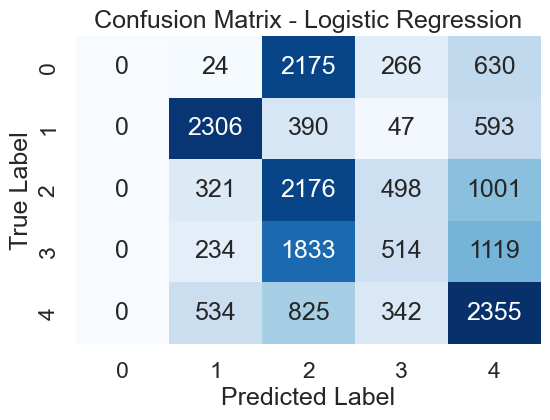

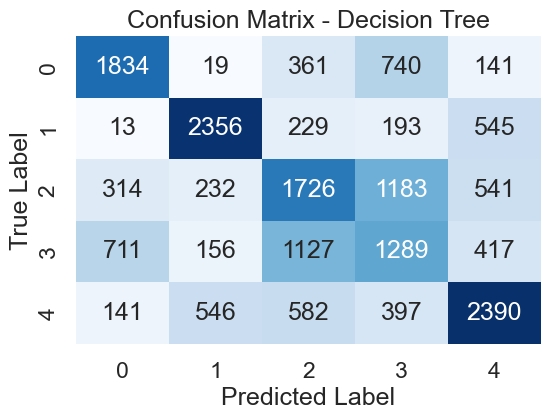

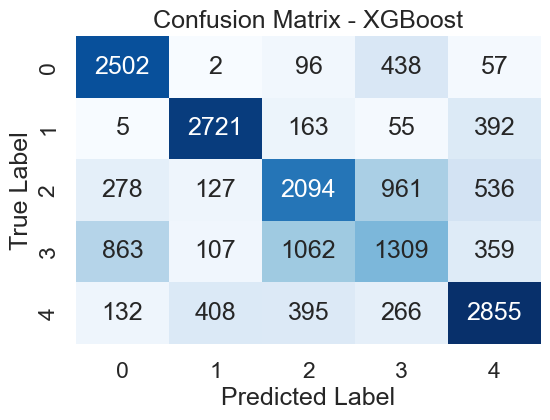

In [84]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define function to plot confusion matrix
def plot_confusion_matrix(model_name, cm):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Compute confusion matrices
log_reg_cm = confusion_matrix(y_test, log_reg_test_preds)
decision_tree_cm = confusion_matrix(y_test, decision_tree_test_preds)
xgb_cm = confusion_matrix(y_test, xgb_test_preds)

# Plot confusion matrices
plot_confusion_matrix("Logistic Regression", log_reg_cm)
plot_confusion_matrix("Decision Tree", decision_tree_cm)
plot_confusion_matrix("XGBoost", xgb_cm)


In [ ]:
# # Hyperparameter tuning
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001],
#     'n_estimators': [100, 200, 300],
#     'min_child_weight': [1, 3, 5]
# }

# # Initialize XGBoost classifier
# xgb = XGBClassifier(random_state=42)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')

# # Perform grid search
# grid_search.fit(X_train_scaled, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_

# # Train a new XGBoost classifier with the best parameters
# best_xgb = XGBClassifier(**best_params, random_state=42)
# best_xgb.fit(X_train_scaled, y_train)

# # Evaluate the new XGBoost classifier
# best_xgb_test_preds = best_xgb.predict(X_test_scaled)
# best_xgb_test_accuracy = accuracy_score(y_test, best_xgb_test_preds)

# # Display the best parameters and the improved accuracy score
# print("Best Parameters:", best_params)
# print("Improved Test Accuracy:", best_xgb_test_accuracy)


In [ ]:
# # Calculate precision, recall, and F1-score for XGBoost
# xgb_precision = precision_score(y_test, best_xgb_test_preds, average='weighted', zero_division=0)
# xgb_recall = recall_score(y_test, best_xgb_test_preds, average='weighted', zero_division=0)
# xgb_f1 = f1_score(y_test, best_xgb_test_preds, average='weighted', zero_division=0)

# # Display precision, recall, and F1-score for each classifier
# print("XGBoost - Precision:", xgb_precision)
# print("XGBoost - Recall:", xgb_recall)
# print("XGBoost - F1-score:", xgb_f1)


In [ ]:
# # Plot confusion matrix for XGBoost
# xgb_cm = confusion_matrix(y_test, best_xgb_test_preds)
# plt.figure(figsize=(10, 8))
# sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
# plt.xlabel('Predicted Labels')
# plt.ylabel('True Labels')
# plt.title('Confusion Matrix - XGBoost')
# plt.show()

#### Section F - 13 Rolling Window Mapping target feature (Label-Encoding classes)

In [85]:
## assign it as the masterTable rolling_metrics_all_surfaces

masterTable = rolling_metrics_all_surfaces.copy()

In [86]:
# Define the mapping
label_mapping = {
    'tile': 0,
    'grass': 1,
    'asphalt': 2,
    'concrete': 3,
    'stones': 4
}

# Map the labels using the dictionary
masterTable['Encoded_Surface'] = masterTable['surface'].map(label_mapping)

# Display the DataFrame with the new encoded labels
masterTable.sample(5)


x accelerometer_mean  x accelerometer_std  x accelerometer_Skewness  \
41015              0.006416             0.108419                  0.495226   
10207             -0.040554             0.106755                 -0.161870   
59008             -0.052566             0.063646                 -0.139601   
62977             -0.002468             0.018873                 -0.398301   
59047             -0.067261             0.065831                 -0.621368   

       x accelerometer_kortsosis  y accelerometer_mean  y accelerometer_std  \
41015                   1.491494             -0.039526             0.067434   
10207                  -0.630968             -0.189233             0.117539   
59008                  -0.093186             -0.089746             0.057201   
62977                   5.224064             -0.080637             0.025069   
59047                   0.885211             -0.083801             0.065152   

       y accelerometer_Skewness  y accelerometer_kortsosis  \
41015                 -0.229914                   0.951504   
10207                 -0.796253                   0.936534   
59008                 -0.276779                   0.273477   
62977                 -0.729422                  -0.461774   
59047                 -0.384711                  -0.571453   

       z accelerometer_mean  z accelerometer_std  ...  y gyro_mean  \
41015             -1.008315             0.111629  ...     0.514831   
10207             -0.984810             0.165797  ...    -0.237579   
59008             -1.001008             0.062292  ...    -2.601318   
62977             -1.006934             0.011129  ...     0.274963   
59047             -1.008135             0.072398  ...    -1.408996   

       y gyro_std  y gyro_Skewness  y gyro_kortsosis  z gyro_mean  z gyro_std  \
41015    1.459037         1.138301          4.145817     0.591431    1.661159   
10207    5.112770        -0.239735         -0.313490    -0.234070    4.559489   
59008    2.311701        -0.675349         -0.141887     3.127746    4.335422   
62977    0.240794         0.422148          2.122807     1.037292    1.454367   
59047    3.462909         0.162758         -0.235921     1.643371    6.193508   

       z gyro_Skewness  z gyro_kortsosis   surface  Encoded_Surface  
41015        -0.724191          1.248889  concrete                3  
10207        -0.066480         -1.067860     grass                1  
59008        -0.189516          0.150573    stones                4  
62977         0.565757         -1.397844      tile                0  
59047        -0.531271         -0.585230    stones                4  

[5 rows x 26 columns]

In [87]:
# now we can remove the string lable 'Surface'
masterTable.drop('surface', axis =1 , inplace = True)

In [88]:
masterTable

x accelerometer_mean  x accelerometer_std  x accelerometer_Skewness  \
99                -0.029038             0.036555                 -0.142850   
100               -0.029443             0.036777                 -0.120110   
101               -0.030015             0.037014                 -0.088380   
102               -0.030515             0.037262                 -0.061933   
103               -0.031011             0.037554                 -0.040147   
...                     ...                  ...                       ...   
72726             -0.006641             0.022679                  0.363796   
72727             -0.006648             0.022679                  0.364750   
72728             -0.006230             0.022661                  0.325434   
72729             -0.005952             0.022334                  0.358965   
72730             -0.005740             0.022267                  0.338057   

       x accelerometer_kortsosis  y accelerometer_mean  y accelerometer_std  \
99                     -0.717514             -0.329795             0.027503   
100                    -0.765025             -0.330303             0.027412   
101                    -0.810087             -0.330828             0.027334   
102                    -0.854935             -0.331470             0.027049   
103                    -0.901093             -0.332087             0.026735   
...                          ...                   ...                  ...   
72726                   0.595992             -0.048196             0.018439   
72727                   0.596105             -0.048774             0.018919   
72728                   0.578814             -0.048645             0.018753   
72729                   0.670190             -0.049260             0.018529   
72730                   0.697656             -0.049365             0.018480   

       y accelerometer_Skewness  y accelerometer_kortsosis  \
99                    -0.270220                  -0.844878   
100                   -0.234188                  -0.847066   
101                   -0.196780                  -0.850090   
102                   -0.178376                  -0.845094   
103                   -0.163277                  -0.834195   
...                         ...                        ...   
72726                  0.496528                   0.371466   
72727                  0.414906                   0.407719   
72728                  0.440277                   0.454896   
72729                  0.451507                   0.543159   
72730                  0.468259                   0.589882   

       z accelerometer_mean  z accelerometer_std  ...  x gyro_kortsosis  \
99                -0.952708             0.014868  ...         -1.455349   
100               -0.952693             0.014863  ...         -1.464161   
101               -0.952773             0.014866  ...         -1.466232   
102               -0.952852             0.014888  ...         -1.459027   
103               -0.953044             0.014959  ...         -1.441875   
...                     ...                  ...  ...               ...   
72726             -1.006924             0.025051  ...         -0.662806   
72727             -1.006917             0.025050  ...         -0.662806   
72728             -1.006458             0.024857  ...         -0.658677   
72729             -1.006846             0.025007  ...         -0.659695   
72730             -1.006921             0.025046  ...         -0.648721   

       y gyro_mean  y gyro_std  y gyro_Skewness  y gyro_kortsosis  \
99       -0.794220    2.114598        -0.524816         -0.814161   
100      -0.829926    2.112979        -0.486793         -0.845140   
101      -0.864258    2.110971        -0.449602         -0.871023   
102      -0.892792    2.108662        -0.416264         -0.887877   
103      -0.915070    2.107320        -0.387837         -0.900740   
...            ...         ...              ...              

#### Section F - 14 Rolling Window Dataset checking multicollinearity

In [89]:
###
data = masterTable.copy()
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values) # The lower triangle

# Make the unused values NaNs
corr_array = np.array(corr_values) # Changing the df to an array
corr_array[tril_index] = np.nan # Assigning the lower traingle to nan
    
# Recreate Pandas correlation data frame
corr_values = pd.DataFrame(corr_array,columns = corr_values.columns, index= corr_values.index)

# Stack the data and convert to a data frame
corr_values = (corr_values
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()
corr_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   feature1         276 non-null    object 
 1   feature2         276 non-null    object 
 2   correlation      276 non-null    float64
 3   abs_correlation  276 non-null    float64
dtypes: float64(2), object(2)
memory usage: 8.8+ KB


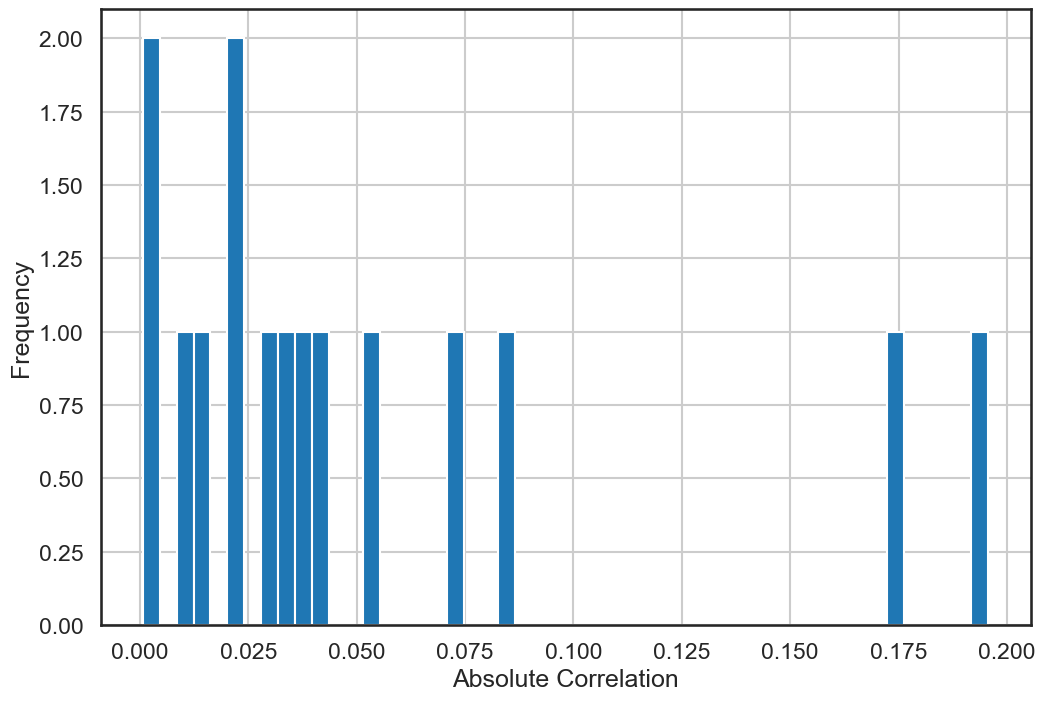

In [75]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

#### Section F - 15 Rolling Window Dataset Machine Learning

In [90]:
from sklearn.model_selection import train_test_split

# Split the data into features (X) and target labels (y)
X = masterTable.drop('Encoded_Surface', axis = 1)
y = masterTable['Encoded_Surface'] # target feature 

# Split the data into training (75%) and test (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (54177, 24) (54177,)
Test set shape: (18059, 24) (18059,)


In [91]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train) # formulating (equation)
X_test_scaled = scaler.transform(X_test) # tranforming only 

# Display the first few rows of the scaled training data to verify the transformation
print("Scaled Training Data:")
print(X_train_scaled[:5])

# Display the first few rows of the scaled test data to verify the transformation
print("Scaled Test Data:")
print(X_test_scaled[:5])


Scaled Training Data:
[[ 0.13845552  0.84680201  1.74168497  2.30429151  0.71689337 -0.20790534
  -0.16144235  0.58185045 -0.50921923  0.00735583 -1.00268634 -0.19973713
  -0.26644342 -0.47097644  0.14871281  1.43799169  0.13209672 -0.26832924
  -2.06904948  1.77866038  0.17183456 -0.60980814 -0.38081042  0.2670471 ]
 [ 0.56330813 -1.27576487 -0.41981209 -0.6338609   0.58659872 -1.32291768
  -0.30609603 -0.71721022 -0.42438913 -1.17491938  0.7988309  -0.20068155
   0.00850051 -0.96143532 -0.0119273  -0.49941618 -0.02209012 -0.91402313
  -0.38545582 -0.75928575  0.07989062 -0.61236498  0.39480593 -0.96625557]
 [ 0.81425572 -2.29446858 -0.29203068 -0.34226208  0.23446019 -2.39327946
  -0.42538187 -0.59914307 -0.3970251  -1.97005629  0.59898139 -0.597371
   0.04384549 -1.20500397 -0.53558434 -0.06993683  0.00701659 -1.16918607
  -0.22654876 -0.30165453 -0.00398046 -1.02649519 -0.27429378 -0.49732461]
 [-0.28552176  0.61451401  0.52066706 -0.48613414  0.58914606 -0.36896974
   1.19627575 -

In [92]:
from sklearn.linear_model import LogisticRegression # Equation 
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Initialize classifiers
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

# # Train and evaluate Logistic Regression
log_reg.fit(X_train_scaled, y_train)
log_reg_train_preds = log_reg.predict(X_train_scaled)
log_reg_test_preds = log_reg.predict(X_test_scaled)
log_reg_train_accuracy = accuracy_score(y_train, log_reg_train_preds)
log_reg_test_accuracy = accuracy_score(y_test, log_reg_test_preds)

# Train and evaluate Decision Tree
decision_tree.fit(X_train_scaled, y_train)
decision_tree_train_preds = decision_tree.predict(X_train_scaled)
decision_tree_test_preds = decision_tree.predict(X_test_scaled)
decision_tree_train_accuracy = accuracy_score(y_train, decision_tree_train_preds)
decision_tree_test_accuracy = accuracy_score(y_test, decision_tree_test_preds)

# Train and evaluate XGBoost
xgb.fit(X_train_scaled, y_train)
xgb_train_preds = xgb.predict(X_train_scaled)
xgb_test_preds = xgb.predict(X_test_scaled)
xgb_train_accuracy = accuracy_score(y_train, xgb_train_preds)
xgb_test_accuracy = accuracy_score(y_test, xgb_test_preds)

# # Display accuracies
print("Logistic Regression - Train Accuracy:", log_reg_train_accuracy)
print("Logistic Regression - Test Accuracy:", log_reg_test_accuracy)
print("Decision Tree - Train Accuracy:", decision_tree_train_accuracy)
print("Decision Tree - Test Accuracy:", decision_tree_test_accuracy)
print("XGBoost - Train Accuracy:", xgb_train_accuracy)
print("XGBoost - Test Accuracy:", xgb_test_accuracy)


/Users/bushrajalali/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Train Accuracy: 0.9531535522454178
Logistic Regression - Test Accuracy: 0.9507170939697658
Decision Tree - Train Accuracy: 1.0
Decision Tree - Test Accuracy: 0.997120549310593
XGBoost - Train Accuracy: 1.0
XGBoost - Test Accuracy: 0.9999446259482806


`Is there a possibility of data leakage or overfitting?`

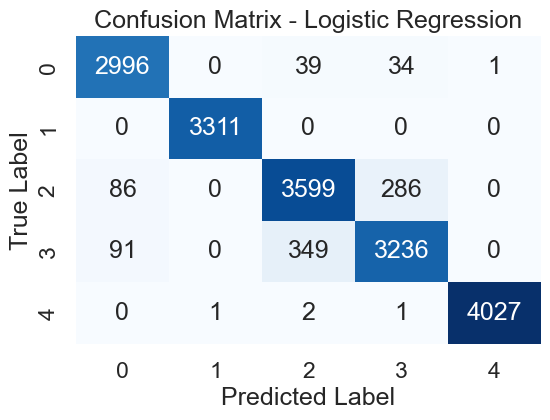

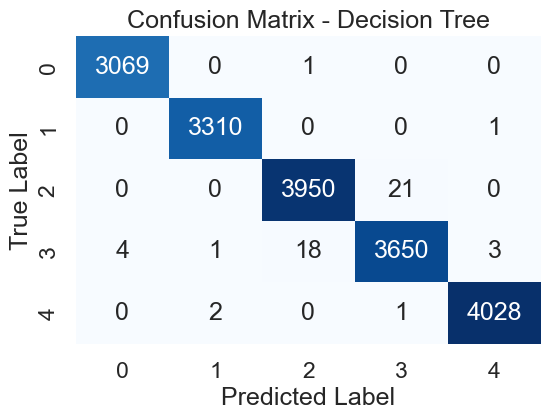

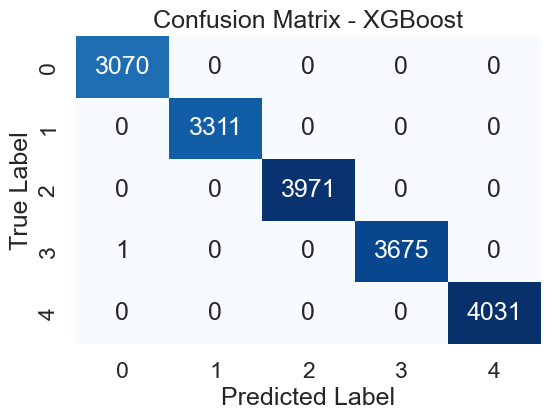

In [93]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define function to plot confusion matrix
def plot_confusion_matrix(model_name, cm):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Compute confusion matrices
log_reg_cm = confusion_matrix(y_test, log_reg_test_preds)
decision_tree_cm = confusion_matrix(y_test, decision_tree_test_preds)
xgb_cm = confusion_matrix(y_test, xgb_test_preds)

# Plot confusion matrices
plot_confusion_matrix("Logistic Regression", log_reg_cm)
plot_confusion_matrix("Decision Tree", decision_tree_cm)
plot_confusion_matrix("XGBoost", xgb_cm)
